# Cargar los datos Json con elasticSearch

In [5]:
#CREAR UN INDEX PARA ALMACENAR LOS DATOS
from elasticsearch import Elasticsearch
from pprint import pprint

es = Elasticsearch()

if not(es.indices.exists(index="p8")):
    res = es.indices.create(index="p8")  
    pprint(res)


In [6]:
#LISTAR LOS ARCHIVOS DEL DATASET
import json
import os
files = os.listdir("split_tweets")
pprint(len(files))

354586


In [7]:
from elasticsearch import helpers

#CARGAR LOS DATOS EN ELASTICSEARCH
tweets=[]

for filename in files:
    with open('split_tweets/'+filename) as f:
        try:
            #pprint(filename+':')
            tweet = json.load(f)
            timestamp=int(tweet["timestamp_ms"])
            #pprint(tweet)
            simple_tweet = {
                "timestamp":timestamp, \
                "date":tweet["created_at"], \
               "text": tweet['text'], \
               "username": tweet['user']['name'], \
               "location": tweet['user']['location']}
        except KeyError:
            error="error"
            
    tweets.append(simple_tweet)#remove comment
    
    #CARGAMOS LOS DATOS EN ELASTICSEARCH CON CONSULTAS 'BULK' PARA OPTIMIZAR EL PROCESO
    if (len(tweets)>=1000):
        i=0
        docs_as_string="["
        while i<1000:
            if i!=0:
                docs_as_string = docs_as_string + ','
            docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
            i=i+1
        docs_as_string=docs_as_string+"]"
        res = helpers.bulk(es, json.loads(docs_as_string),index="p8", doc_type="_doc")
        tweets=[]

BulkIndexError: ('500 document(s) failed to index.', [{'index': {'_index': 'p8', '_type': '_doc', '_id': 'QjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365797798, 'date': 'Sat May 26 20:16:37 +0000 2018', 'text': 'RT @RanveerOfficial: YES YES YES yessss!!!!!! Sadio Mane!!!!  💪🏾⚽️ one of my favourite players to watch in the @premierleague!!! I just kne…', 'username': 'Toaa Tota', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'QzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365126998, 'date': 'Sat May 26 20:05:26 +0000 2018', 'text': 'RT @mohammedmohewer: ليلة المسلمين :   #UCLfinal\nبدايتها من صلاح  \nهدف كريم بنزيما\nهدف ماني', 'username': 'ملاك', 'location': 'في حديقه الخلفيه لي أوروبا'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361741434, 'date': 'Sat May 26 19:09:01 +0000 2018', 'text': 'RT @LFC: The Reds.\n\n#UCLfinal https://t.co/fFITznl3RR', 'username': 'CRVG_DANICARLOS', 'location': 'Capixaba, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362750939, 'date': 'Sat May 26 19:25:50 +0000 2018', 'text': 'RT @Acemashudu: South Africans lets gain! Retweet, Follow Me, Follow @Aey_dear @Ni_Nyiko @Itu_Magohle @BongeloSimphiwe @bophelo_rooimes @Em…', 'username': 'Arthur Junior', 'location': 'Polokwane,RSA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363684816, 'date': 'Sat May 26 19:41:24 +0000 2018', 'text': 'RT @Top_Foottbal: دموعك غاليه ي فخر العرب 😢💔\n#UCLFinal https://t.co/dw84dmwXgL', 'username': 'رياضة', 'location': 'Saudi Arabia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363990671, 'date': 'Sat May 26 19:46:30 +0000 2018', 'text': 'RT @DukeOfZamunda: Tainted for who? Lmfao https://t.co/5OMHHLECfr', 'username': 'Scouse Dani Alves', 'location': 'Earth 616 Space Sector 2814'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'SDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362106846, 'date': 'Sat May 26 19:15:06 +0000 2018', 'text': 'Ramos wieder der Vollspast!  #UCLfinal', 'username': '★☆ 🅼🅸🅲🅷🅰🅴🅻 ☆ ★', 'location': 'Buxtehude, Deutschland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'STulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362378739, 'date': 'Sat May 26 19:19:38 +0000 2018', 'text': "RT @ibra_frb: T'est marabout ? https://t.co/QmKTxjwsla", 'username': 'Miilton 🇨🇮🇧🇯', 'location': "Côte d'Ivoire"}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'SjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361921136, 'date': 'Sat May 26 19:12:01 +0000 2018', 'text': 'Too much😅😆 https://t.co/Sfrkpvu6uc', 'username': 'everyone🔂', 'location': 'Pretoria & Mayflower, AR'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'SzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363685698, 'date': 'Sat May 26 19:41:25 +0000 2018', 'text': 'RT @TrollFootball: The #UCLFinal so far https://t.co/UtSqALA4Ia', 'username': 'kamex', 'location': 'Terengganu'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363959730, 'date': 'Sat May 26 19:45:59 +0000 2018', 'text': 'RT @Simon_Amos84: Replay of that Ramos challenge #UCLfinal https://t.co/87rtH94EAg', 'username': 'Ragnar Lothbrok', 'location': 'one step ahead of you'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361884766, 'date': 'Sat May 26 19:11:24 +0000 2018', 'text': 'Que sucio es ese Sergio Ramos \U0001f92e #UCLFinal', 'username': 'Valeria Miranda', 'location': 'Costa Rica'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361106380, 'date': 'Sat May 26 18:58:26 +0000 2018', 'text': "RT @ChampionsLeague: ⌛️1⃣ hour to kick-off in the #UCLfinal\n⚪️ or 🔴?\n\nThe #UCLfinal kicks off at 20:45CET: don't miss it! https://t.co/Yvok…", 'username': 'Gerson Cortez', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363230670, 'date': 'Sat May 26 19:33:50 +0000 2018', 'text': "RT @MapsMaponyane: I was looking forward to this final because of Mo Salah. Won't be any good with No Salah. #UCLfinal", 'username': 'Joshua Gonzalez', 'location': 'Las Vegas, NV'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362017171, 'date': 'Sat May 26 19:13:37 +0000 2018', 'text': 'Si..el comentarista a dicho que Salah mete el brazo por debajo de de Ramos.. #UCLFINAL', 'username': 'Guillermo Diaz', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362017171, 'date': 'Sat May 26 19:13:37 +0000 2018', 'text': 'Si..el comentarista a dicho que Salah mete el brazo por debajo de de Ramos.. #UCLFINAL', 'username': 'Guillermo Diaz', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367303661, 'date': 'Sat May 26 20:41:43 +0000 2018', 'text': 'RT @ImRo45: That second goal of @GarethBale11 has sealed yet another convincing @ChampionsLeague finals for @realmadrid #HALAMADRID #UCLfin…', 'username': 'Sanket Patil', 'location': 'Pune, India'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366323041, 'date': 'Sat May 26 20:25:23 +0000 2018', 'text': '😭😭😭😭 https://t.co/EJfe5Jkwer', 'username': 'Jade', 'location': 'Limoeiro, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366825759, 'date': 'Sat May 26 20:33:45 +0000 2018', 'text': "RT @ChampionsLeague: A sad way for Salah's season to finish 😢\n\n#UCLfinal https://t.co/6v2Y0MKNBe", 'username': 'Lucstar_Great', 'location': 'Johannesburg, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363801738, 'date': 'Sat May 26 19:43:21 +0000 2018', 'text': 'Para los que según ellos entienden de fútbol, acá está 👇🏻\U0001f92b https://t.co/J08qjRjq8b', 'username': 'Pineda.', 'location': 'insta_juniorpineda3'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365290013, 'date': 'Sat May 26 20:08:10 +0000 2018', 'text': 'RT @the_emmyy: لا يارب https://t.co/QnyfzSbGCy', 'username': 'mennaa.', 'location': 'Cairo, Egypt'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362207686, 'date': 'Sat May 26 19:16:47 +0000 2018', 'text': 'Mohamed Salah in tears as he walks off the pitch with a shoulder injury. #UCLfinal', 'username': 'ALL IN Sports Talk', 'location': 'Dallas, TX'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363196808, 'date': 'Sat May 26 19:33:16 +0000 2018', 'text': 'RT @norcoreano: Ramos, el héroe de la decimotercera. #UCLfinal https://t.co/3OA6B1iBBM', 'username': 'M. Rajoy', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363672790, 'date': 'Sat May 26 19:41:12 +0000 2018', 'text': "RT @MaddockMirror: Honestly, that was a disgrace from Sergio Ramos. He's ended @MoSalah's night, and possibly his World Cup with a cynical,…", 'username': 'Haaaaaafiiz', 'location': 'Recalculating....'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367177666, 'date': 'Sat May 26 20:39:37 +0000 2018', 'text': 'RT @globoesportecom: Real campeão pela 13ª vez! Time merengue derrota o Liverpool por 3 a 1 e leva mais uma taça para casa #UCLFinal https:…', 'username': 'akira', 'location': 'Paris, France'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363776794, 'date': 'Sat May 26 19:42:56 +0000 2018', 'text': 'Big blow to \n#LFC \n#UCLfinal', 'username': 'Ignatius Egbefome🇬🇭', 'location': 'Greater Accra, Ghana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365332777, 'date': 'Sat May 26 20:08:52 +0000 2018', 'text': 'RT @FOXDeportes: La reacción de Ramos mientras Salah dejaba la cancha lesionado. \n#ChampionsxFOX #UCLfinal https://t.co/hcv8MiGqYu', 'username': 'Nani Masriera', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364483923, 'date': 'Sat May 26 19:54:43 +0000 2018', 'text': 'RT @bilalshn: Most disgusting &amp; disgraceful footballer @SergioRamos #UCLfinal #ChampionsLeagueFinal #YNWA #UCLFinal2018', 'username': 'Esperera', 'location': 'Selangor, Malaysia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362037469, 'date': 'Sat May 26 19:13:57 +0000 2018', 'text': 'RT @FootbaIIBattIes: RT for Gerrard🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f\nLIKE for Modric🇭🇷\n\n#UCLFinal https://t.co/ewjw1E2QH0', 'username': "Stevie's Girl", 'location': 'Dundee, Scotland '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367412763, 'date': 'Sat May 26 20:43:32 +0000 2018', 'text': 'I bet that fan was a better goal stopper than the keeper #UCLfinal', 'username': 'Dryboy Inc.', 'location': 'nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366516844, 'date': 'Sat May 26 20:28:36 +0000 2018', 'text': 'Ramos deserved a red card on the spot.\nIts an unfair game. 12 against 11.\n#UCLfinal', 'username': 'Elizabeth', 'location': 'Milky Way'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364494222, 'date': 'Sat May 26 19:54:54 +0000 2018', 'text': "Open goal and HIT THE BAR???? LMAO Madrid aren't winning the gods have spoken #UCLfinal", 'username': 'sh4y', 'location': 'London, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363937865, 'date': 'Sat May 26 19:45:37 +0000 2018', 'text': 'I’m certain rival fans laughed when Salah went off injured. Laughing at another human crying just says so much abou… https://t.co/00rlXNBRSs', 'username': 'Leigh', 'location': 'North West, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363663773, 'date': 'Sat May 26 19:41:03 +0000 2018', 'text': 'cc: @monyetbesar  tah, karek sakeudeung, sabaraha rebu urang nyalahkeun ramos https://t.co/FDzqI9BsNs', 'username': 'Nay', 'location': 'Cimahi'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366588598, 'date': 'Sat May 26 20:29:48 +0000 2018', 'text': 'Kipernya gitu banget #UCLfinal', 'username': 'Yanuar A. Baihaqi', 'location': 'pekalongan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364335399, 'date': 'Sat May 26 19:52:15 +0000 2018', 'text': '#MoSalah\nTRAGIC! Feel like crying really! \nGet well soon dear,,, \n\nYou will never walk alone!! \n\n#lfc #LIVRMA… https://t.co/wDPIBIzBuK', 'username': 'Arsalan Aslam🇵🇰', 'location': 'Pakistan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363820798, 'date': 'Sat May 26 19:43:40 +0000 2018', 'text': 'RT @OsasCruz: RETWEET if you think Sergio Ramos injured Mohamed Salah on purpose? #UCLfinal', 'username': 'Telangana people', 'location': 'Hyderabad, Telangana , INDIA. '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366723736, 'date': 'Sat May 26 20:32:03 +0000 2018', 'text': 'Jedes Jahr dieselbe Scheiße. Ich kotz im Strahl.\nFUCK YOU! #UCLFinal #RMALFC', 'username': 'Valerie', 'location': 'Thüringen, Deutschland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'aDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364261676, 'date': 'Sat May 26 19:51:01 +0000 2018', 'text': 'Does anyone have a pic of when Trent was doing the throw-in and there was a BEAUTIFUL shot of the liverpool fans #YNWA #UCLFinal', 'username': 'Neji', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'aTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364462775, 'date': 'Sat May 26 19:54:22 +0000 2018', 'text': 'Assist di Lallana al giocatore sbagliato, Karius a farfalle e Isco manda sulla traversa a porta vuota.\nForse è un segnale divino.\n\n#UCLFinal', 'username': 'Jacopo Ramazzotti', 'location': 'Pistoia, Toscana, Italia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ajulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361950943, 'date': 'Sat May 26 19:12:30 +0000 2018', 'text': '#UCLfinal \nCongrats to Liverpool for getting here.....\nGood luck tonight lads 🍀', 'username': 'DW', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'azulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367077670, 'date': 'Sat May 26 20:37:57 +0000 2018', 'text': 'Lo bueno que el próximo año la vamos a ganar nosotros que si no ahorita estaría muy rayado\n#UCLFinal', 'username': 'GiovAny', 'location': 'BABY C THE LIGTH OF MY LIFE'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367077670, 'date': 'Sat May 26 20:37:57 +0000 2018', 'text': 'Lo bueno que el próximo año la vamos a ganar nosotros que si no ahorita estaría muy rayado\n#UCLFinal', 'username': 'GiovAny', 'location': 'BABY C THE LIGTH OF MY LIFE'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367107886, 'date': 'Sat May 26 20:38:27 +0000 2018', 'text': 'Cristiano denied by a streaker lmaoooooo #UCLfinal #UCLFinal2018 #ramos', 'username': 'Jonas Bichara', 'location': 'Paris, France'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363235011, 'date': 'Sat May 26 19:33:55 +0000 2018', 'text': 'RT @EASPORTSFIFA: The #UCLFinal ends early for Salah 😢 https://t.co/rz2sHf2qfT', 'username': 'Abid', 'location': 'London'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363235011, 'date': 'Sat May 26 19:33:55 +0000 2018', 'text': 'RT @EASPORTSFIFA: The #UCLFinal ends early for Salah 😢 https://t.co/rz2sHf2qfT', 'username': 'Abid', 'location': 'London'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'cDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362516106, 'date': 'Sat May 26 19:21:56 +0000 2018', 'text': 'RT @ActuFoot_: Superbe ippon de Ramos sur Salah ! Non sanctionné !\n\n#UCLFinal #InnovateYourGame', 'username': 'kevers', 'location': 'Ile-de-France, France'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'cTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362021472, 'date': 'Sat May 26 19:13:41 +0000 2018', 'text': 'Que puta vergüenza lo que acaba de hacer Sergio Ramos, le pudo haber jodido la final a Salah... Pero es el Madrid a… https://t.co/WkbtXzhTvy', 'username': 'WitKraai 🌐', 'location': 'Boñar, León'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'cjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363792127, 'date': 'Sat May 26 19:43:12 +0000 2018', 'text': 'Ferdinand saying it was a good piece of defending from Ramos. You scum #UCLfinal #LFC', 'username': 'Mર Ĵ', 'location': 'Newcastle'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'czulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362405697, 'date': 'Sat May 26 19:20:05 +0000 2018', 'text': 'RT @ScottOstrowsky: Everyone right now watching Salah #UCLfinal https://t.co/iRjVrLtcmd', 'username': '̈́\u200e\u200bRio ̈́́', 'location': 'My pillow fort'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'dDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362926804, 'date': 'Sat May 26 19:28:46 +0000 2018', 'text': "RT @ChampionsLeague: A sad way for Salah's season to finish 😢\n\n#UCLfinal https://t.co/6v2Y0MKNBe", 'username': 'Marwa🍀', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'dTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361586585, 'date': 'Sat May 26 19:06:26 +0000 2018', 'text': 'RT @OptaFranz: 26 – Liverpool’s starting XI is the youngest (26 y 170 d) in an UCL final since Borussia Dortmund 2013 (25 y 255 d). Klopp.…', 'username': 'Ibrahim Mohammed', 'location': 'Sunyani,Ghana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'djulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360820213, 'date': 'Sat May 26 18:53:40 +0000 2018', 'text': 'RT @0832I: #UCLfinal #UCL\n\n地上波はフジテレビだけど、実況は…\n\n①主音声 青嶋アナ\n②副音声 ルミ姐\n③消音\n\n③選んだけど、無音のサッカー試合は、楽しさ半減😭\n\nフジテレビよ、無理して放映権なんてとらんでくれ\n\nマジで迷惑💢\nDAZNに今から譲って…', 'username': 'mattou＠ジェフ', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'dzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364118657, 'date': 'Sat May 26 19:48:38 +0000 2018', 'text': 'RT @ActualidadRT: Informes iniciales (no oficiales) aseguran que Salah se perderá el Mundial después de dislocarse el hombro en una jugada…', 'username': 'ẦļḝXąndḝR ḜvąNşş  🐺', 'location': '🇵🇪 † ĐӡȺŦԋ ӍӡŦȺᶅ † 🇵🇪'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'eDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360562115, 'date': 'Sat May 26 18:49:22 +0000 2018', 'text': 'RT @CesaryLopez: Muchos aficionados del Barca y Atleti apoyando hoy al #Liverpool #UCLFinal https://t.co/7yGm4anVFe', 'username': 'Esther.', 'location': 'Distrito Federal, México'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'eTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364474705, 'date': 'Sat May 26 19:54:34 +0000 2018', 'text': 'Im Pub fangen sie um 21h30 an zu qualmen. Pech, dann eben direkt am Römer bei 23°C die 2 HZ genießen.... #UCLfinal https://t.co/gSurrSkwxx', 'username': 'Karina⚽', 'location': 'Wiesbaden, Deutschland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ejulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364952841, 'date': 'Sat May 26 20:02:32 +0000 2018', 'text': 'RT @LFC_Arabic: 55: ماااااااني ماااااااني مااااااااااني!!!\n\n#UCLFinal https://t.co/kzKQ1Tn4Z9', 'username': "〽️ay'™", 'location': '♏️ In the middle of no where📍'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ezulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365804986, 'date': 'Sat May 26 20:16:44 +0000 2018', 'text': 'التعادل يالليڤر #UCLfinal', 'username': 'آيانو 愛', 'location': 'Makkah , Saudi Arabia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360490053, 'date': 'Sat May 26 18:48:10 +0000 2018', 'text': "RT @LFC: This is it... the @ChampionsLeague final!\n\nWe're underway in Kiev...\n\n🔴 ALLEZ 🔴\n🔴\xa0ALLEZ 🔴\n🔴 ALLEZ 🔴\n\n#UCLfinal https://t.co/Y5dY9A…", 'username': 'Pitch Black', 'location': 'Other side of light'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360367981, 'date': 'Sat May 26 18:46:07 +0000 2018', 'text': 'RT @LFC: 🔴 COME ON YOU REDS! 🔴\n\n#UCLfinal https://t.co/JgOT1J52ws', 'username': 'VOLTA CUCA', 'location': 'Rio das Ostras, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367167743, 'date': 'Sat May 26 20:39:27 +0000 2018', 'text': 'The sound when he connected 🔥🔥🔥🔥 https://t.co/COXy5w26wP', 'username': 'PADI_RSA🇿🇦', 'location': 'Tembisa '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361673492, 'date': 'Sat May 26 19:07:53 +0000 2018', 'text': 'RT @AnthonyShackels: THAT TRANSITION WAS EVERYTHING BABE @DUALIPA #UCLFinal https://t.co/pGODbbsPG6', 'username': 'Valeria', 'location': 'Alpharetta, GA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364385954, 'date': 'Sat May 26 19:53:05 +0000 2018', 'text': 'RT @Yallakoranow: محمد ابوتريكه : مافعله راموس ضد صلاح يعتبر جريمه ! #UCLfinal https://t.co/BoEF7HBlRv', 'username': '_Islam_@@@', 'location': 'القاهرة, مصر'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364385954, 'date': 'Sat May 26 19:53:05 +0000 2018', 'text': 'RT @Yallakoranow: محمد ابوتريكه : مافعله راموس ضد صلاح يعتبر جريمه ! #UCLfinal https://t.co/BoEF7HBlRv', 'username': '_Islam_@@@', 'location': 'القاهرة, مصر'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366592664, 'date': 'Sat May 26 20:29:52 +0000 2018', 'text': 'Karius is worst best keeper 😔 😔 #UCLfinal', 'username': 'Stamford Barry', 'location': 'Garden City, PH '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365523860, 'date': 'Sat May 26 20:12:03 +0000 2018', 'text': "RT @GoalcomNigeria: RT if you saw Bale's bicycle kick #ShareTheDrama #UCLfinal #CrespoInLagos https://t.co/kc3eihVjib", 'username': 'Olakunle FAYIGA', 'location': 'Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365195759, 'date': 'Sat May 26 20:06:35 +0000 2018', 'text': "La joie du #REAL n'a pas été de longue durée \nÉgalisation de #Liverpool\nTout est à  refaire\n#HalaMadrid #UCLfinal", 'username': 'ADJEODA Yawovi', 'location': 'Abidjan-Riviera '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361574206, 'date': 'Sat May 26 19:06:14 +0000 2018', 'text': '😂😂 https://t.co/HOMUx3veP6', 'username': 'Diana', 'location': 'WHK'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363002953, 'date': 'Sat May 26 19:30:02 +0000 2018', 'text': 'RT @IndyFootball: BREAKING: Mohamed Salah leaves #UCLfinal in tears https://t.co/KolOcrPWE0 https://t.co/dIcjOWTnNg', 'username': '⚽️ Five Star Footy ⚽️', 'location': 'United Kingdom'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363461811, 'date': 'Sat May 26 19:37:41 +0000 2018', 'text': 'RT @Sporf: ⚽️ @Benzema scores for @RealMadrid.\n\n🎉 @RealMadrid bench celebrates.\n\n❌ Goal disallowed for offside.\n\n😅 Jurgen Klopp’s reaction.…', 'username': 'Ugo👉🏼😑👈🏼', 'location': 'France'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'iDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365476774, 'date': 'Sat May 26 20:11:16 +0000 2018', 'text': 'RT @BleacherReport: Gareth Bale with an incredible BICYCLE KICK! \n\n#UCLFinal', 'username': 'Zach Winterberg', 'location': 'Tampa, FL'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'iTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361376892, 'date': 'Sat May 26 19:02:56 +0000 2018', 'text': '#UCLfinal\nUnd heute alle mal ein bisschen Liverpool 😍\n#Kloppo', 'username': 'Zugente', 'location': 'Now:Oldenburg (formerly:Mainz)'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ijulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366065203, 'date': 'Sat May 26 20:21:05 +0000 2018', 'text': '★★★ Yearly Membership Offers ★★★\n\nOur Website ➜ https://t.co/saYxgduSEc \n\n#Escort #Escorts #news #RealMadrid… https://t.co/KU5j7Cjldg', 'username': 'Costa Rica Escorts', 'location': 'San Jose'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'izulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366782660, 'date': 'Sat May 26 20:33:02 +0000 2018', 'text': 'RT @iFutbola: EL REY DE EUROPA a cuatro minutos de la "DÉCIMO TERCERA". Tal vez no seas aficionados del elenco blanco pero por lo menos res…', 'username': 'Luis Fernando Alvarez', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364268668, 'date': 'Sat May 26 19:51:08 +0000 2018', 'text': "Close sources to #Salah say it could be a broken collar bone or a broken shoulder .. that's 2-6 months injures #UCLFinal", 'username': 'Abdo Kallawy', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363165854, 'date': 'Sat May 26 19:32:45 +0000 2018', 'text': 'イスコ何回ダブルタッチで突き進んだんだ #UCLFinal', 'username': 'kuro', 'location': '米と朱鷺の国'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362543781, 'date': 'Sat May 26 19:22:23 +0000 2018', 'text': 'RT @Simon_Amos84: Replay of that Ramos challenge #UCLfinal https://t.co/87rtH94EAg', 'username': 'Fırat Taştan', 'location': 'İzmir/Karşıyaka'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367116710, 'date': 'Sat May 26 20:38:36 +0000 2018', 'text': '#UCLfinal\nThat fan is my hero.', 'username': 'DOUG!', 'location': 'Nairobi, Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367116710, 'date': 'Sat May 26 20:38:36 +0000 2018', 'text': '#UCLfinal\nThat fan is my hero.', 'username': 'DOUG!', 'location': 'Nairobi, Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363295756, 'date': 'Sat May 26 19:34:55 +0000 2018', 'text': 'No one is going to survive #UCLfinal', 'username': 'Faiyaz', 'location': 'localhost'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363926894, 'date': 'Sat May 26 19:45:26 +0000 2018', 'text': "RT @TheSporTalk: Football isn't fair sometimes.\n\n#UCLFinal #YNWA #LFC\n#ChampionsLeagueFinal https://t.co/p0bcirrE4W", 'username': 'fitrihassan', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366835761, 'date': 'Sat May 26 20:33:55 +0000 2018', 'text': '@GarethBale11 coming up big in a final once again #UCLfinal', 'username': 'N T P', 'location': 'Brighton, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'lDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364970566, 'date': 'Sat May 26 20:02:50 +0000 2018', 'text': 'RT @LFCEspanol: GOOOOOOLLLLL de Sadio Mane!!! 1️⃣-1️⃣ #UCLfinal https://t.co/7Au4pvjcQ1', 'username': 'Lutfil Hadi', 'location': 'The Lion City'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'lTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366526640, 'date': 'Sat May 26 20:28:46 +0000 2018', 'text': 'RT @Frau_Boateng: The acting!! 😂 Oscar worthy! #UCLFINAL  https://t.co/lH6sxcttzy #RealMadrid #Liverpool', 'username': 'M.Z', 'location': 'Tunisie'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ljulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361268952, 'date': 'Sat May 26 19:01:08 +0000 2018', 'text': 'Too much stress 😥#UCLfinal', 'username': 'Hussein Jaber', 'location': 'Beirut, Lebanon'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'lzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360582114, 'date': 'Sat May 26 18:49:42 +0000 2018', 'text': 'Con mi Momo no eh @Cristiano 😡😒 https://t.co/Xf9a8KDXMk', 'username': 'Mariana J. Mendiola', 'location': 'Cloud cuckoo land... 🇲🇽❤️'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363169504, 'date': 'Sat May 26 19:32:49 +0000 2018', 'text': 'Andere Schiris hätten den doch als Tor gezählt 😉 #UCLfinal https://t.co/HrN08doeDA', 'username': 'Eck von Schleck', 'location': 'Deutschland, Auf der Coach'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363169504, 'date': 'Sat May 26 19:32:49 +0000 2018', 'text': 'Andere Schiris hätten den doch als Tor gezählt 😉 #UCLfinal https://t.co/HrN08doeDA', 'username': 'Eck von Schleck', 'location': 'Deutschland, Auf der Coach'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366185205, 'date': 'Sat May 26 20:23:05 +0000 2018', 'text': 'RT @InvictosSomos: Un poema en Kiev. Lo firma Gareth Bale. #UCLfinal https://t.co/G1bYjWc9eX', 'username': 'Dabeer.', 'location': 'Jaén'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366430152, 'date': 'Sat May 26 20:27:10 +0000 2018', 'text': 'RT @C5N: #UCLfinal \n\n⚽ El GOLAZO de @GarethBale11 que pone en ventaja al #RealMadrid\n\nhttps://t.co/TOd7o15EcY', 'username': 'Diego Medina', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'nDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364064133, 'date': 'Sat May 26 19:47:44 +0000 2018', 'text': 'RT @egypro18: رونالدو يواسي #صلاح أثناء خروجه 😔📷\n\n#UCLfinal https://t.co/WrarEGiOj1', 'username': 'ارطغرل', 'location': 'الإسماعيلية, مصر'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'nTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363487956, 'date': 'Sat May 26 19:38:07 +0000 2018', 'text': 'Lo peor de la primera parte son las lesiones de Salah y de Carvajal, ojalá que se recuperen bien para el mundial #UCLfinal', 'username': 'VII.', 'location': '📍Madrid'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'njulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366346245, 'date': 'Sat May 26 20:25:46 +0000 2018', 'text': "RT @Nes_mk2: Sergio Ramos is a dirty cunt, see there he's got Salah's arm pinned despite going to ground he knew full well what he was doin…", 'username': '⛈', 'location': 'Cairo, Egypt'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'nzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366374896, 'date': 'Sat May 26 20:26:14 +0000 2018', 'text': 'Real Madrid to Liverpool... Sho mo age mi? In this competition ni? 🙌 #UCLfinal', 'username': 'Temidayo_Semi_logoe', 'location': 'Lagos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'oDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362248670, 'date': 'Sat May 26 19:17:28 +0000 2018', 'text': 'Ramos the prick. Thinks a Mohawk in 2018 is acceptable. #uclfinal #LiverpoolFC', 'username': 'Ashton', 'location': '18'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'oTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360489212, 'date': 'Sat May 26 18:48:09 +0000 2018', 'text': 'RT @GrownDLipaArg: Dua presentándose en la #UCLFinal (3)\n#ChampionsLeagueFinal https://t.co/NqHpUPyAnI', 'username': '🌸🐻🐰🐱Aku_Lunática🐱🐰🐻🌸', 'location': 'Buenos Aires, Argentina'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ojulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360440432, 'date': 'Sat May 26 18:47:20 +0000 2018', 'text': 'RT @Uefaworld1: 📸 أنظار العالم تتجه إلى أجمل البطولات 🏆\n\n#UCLfinal https://t.co/xPEte14YG1', 'username': 'حساب رياضي ™', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ozulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367000637, 'date': 'Sat May 26 20:36:40 +0000 2018', 'text': 'Madness https://t.co/4nvBNDUZi4', 'username': 'Ice Bear', 'location': 'South africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364509984, 'date': 'Sat May 26 19:55:09 +0000 2018', 'text': 'RT @Amit_Cukierman: Basically what Sergio Ramos did... #UCLfinal https://t.co/YM5G9U6ZxL', 'username': 'Habeeb Sulu', 'location': 'Lagos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362901877, 'date': 'Sat May 26 19:28:21 +0000 2018', 'text': 'Qué opinan de la lesión de Salah? Fue un balón dividido con Ramos? Era para amonestar al español? #UCLFinal https://t.co/F6Gg969wNj', 'username': 'Más Deportes', 'location': 'Bogotá, Colombia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365967757, 'date': 'Sat May 26 20:19:27 +0000 2018', 'text': 'RT @TheAjebutter: Did You see that Goal? \nMehn Bale deserves some accolades 🙌🙌\n@KraksTV \n#UCLfinal \n#UCLFinal2018 \n#halamadrid https://t.co…', 'username': 'Lagos_oracle😎', 'location': 'AalinoxNG'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362134623, 'date': 'Sat May 26 19:15:34 +0000 2018', 'text': '#UCLfinal k raro que Ramos lesione a alguien ... basta ya ... Ramos es de los jugadores más duros del.fútbol… https://t.co/1PnC6Cm2Yv', 'username': 'Fran GP', 'location': 'Madrid, Comunidad de Madrid'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362116963, 'date': 'Sat May 26 19:15:16 +0000 2018', 'text': "RT @paddypower: 'It's not one of those injuries you can run off.'\n\nNo Glenn, it's his f*cking shoulder. #UCLfinal", 'username': 'Ben Fullylove', 'location': 'Watford - UK'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365112033, 'date': 'Sat May 26 20:05:12 +0000 2018', 'text': 'RT @_Karabo_s: Liverpool for the win. Come on boys, do it for Mo Salah #UCLfinal', 'username': 'Old Soul', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363810722, 'date': 'Sat May 26 19:43:30 +0000 2018', 'text': '@_itsomo @drizzyposh25_ Humans of the world! I twerk for you o! #UCLfinal', 'username': 'Ogunjimi Marvellous', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367310701, 'date': 'Sat May 26 20:41:50 +0000 2018', 'text': 'RT @telecincoes: #ÚLTIMAHORA El Real Madrid irrumpe en la historia con la decimotercera Champions League (3-1) #UCLFinal &gt; https://t.co/k2v…', 'username': 'Ana', 'location': 'ugena, toledo .'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365787832, 'date': 'Sat May 26 20:16:27 +0000 2018', 'text': 'RT @GRMDAILY: No words do this justice. #UCLFinal #RMALIV https://t.co/E0j83tQlHR', 'username': 'sim', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362348703, 'date': 'Sat May 26 19:19:08 +0000 2018', 'text': 'RT @JMOxQ__: This might have been planned. #UCLFinal https://t.co/MZJRb7PmOL', 'username': 'KING Dee', 'location': 'nairobi'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364060649, 'date': 'Sat May 26 19:47:40 +0000 2018', 'text': 'RT @ChampionsLeague: Hands of steel from Keylor Navas 👊\n\n#UCLfinal https://t.co/VRCVzKczaV', 'username': 'YOUNGMOGUL 🇳🇬', 'location': 'Lagos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362152093, 'date': 'Sat May 26 19:15:52 +0000 2018', 'text': 'Operation take out Salah successful!\n#UCLfinal #UEFAChampionsLeagueFinal', 'username': 'Sargeant™🇰🇪', 'location': 'Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'sDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365309758, 'date': 'Sat May 26 20:08:29 +0000 2018', 'text': 'UNFASSBAR #UCLfinal', 'username': 'Kurokomo', 'location': 'hoffe bald in Michas armen'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'sTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364300703, 'date': 'Sat May 26 19:51:40 +0000 2018', 'text': 'feci etkisi vardi ya. ama realin bu kadar ileride oynamasi isine gelebilir liverpoolun cunku realin istedigi oyun d… https://t.co/S6zcGlyCqX', 'username': 'Berkin', 'location': 'Sabanci Uni / 734'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'sjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367261801, 'date': 'Sat May 26 20:41:01 +0000 2018', 'text': 'Karius has made a name for himself tonight.\n\n#UCLFinal', 'username': 'One person found this helpful', 'location': 'London, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'szulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363309670, 'date': 'Sat May 26 19:35:09 +0000 2018', 'text': '@SergioRamos  eres un hdp.\nCerdo https://t.co/k5qfgh6MZX', 'username': 'Alexis_machuk', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364130148, 'date': 'Sat May 26 19:48:50 +0000 2018', 'text': 'RT @Futbol_Agent_: Retweet if you hate Ramos! #UCLFinal https://t.co/9aFCvEQ5yy', 'username': 'Frank Castle', 'location': 'Puchong, Selangor'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367258752, 'date': 'Sat May 26 20:40:58 +0000 2018', 'text': 'Real Madrid have completed a hattrick, salute to Zinedine Zidane and his team. #UCLFinal', 'username': 'Modern Day Pantsula', 'location': 'South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361174932, 'date': 'Sat May 26 18:59:34 +0000 2018', 'text': 'RT @DStv: The question is, who is joining us for the #UCLfinal on #DStvNow? RT if you’re spending your Saturday night hooked on the action!…', 'username': 'Sparkle', 'location': 'Johannesburg, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367425786, 'date': 'Sat May 26 20:43:45 +0000 2018', 'text': 'RT @LaLigaEN: 🏆 1956\n🏆 1957\n🏆 1958\n🏆 1959\n🏆 1960 \n🏆 1966\n🏆 1998\n🏆 2000\n🏆 2002\n🏆 2014\n🏆 2016\n🏆 2017\n🏆 2018 \n\n1⃣3⃣\n\nCongratulations @realmadr…', 'username': 'Sunshine. 🌻', 'location': 'Trinidad and Tobago'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'uDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365581764, 'date': 'Sat May 26 20:13:01 +0000 2018', 'text': 'RT @ESPNFC: GARETH BALE. OVERHEAD KICK. \n\nReal Madrid 2-1 Liverpool #UCLFinal https://t.co/lN7gg0C6ZB', 'username': 'CharlieTastic', 'location': 'London, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'uTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361506276, 'date': 'Sat May 26 19:05:06 +0000 2018', 'text': 'RT @worasa_sand: ทีวีไม่มีสัญญาณไปดูบอลห้องพี่ได้ไหม5555 #UCLfinal #ผิดแท๊กใช่ไหม', 'username': '🎈หลงรักเจบีคนชิค❤️', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ujulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365587805, 'date': 'Sat May 26 20:13:07 +0000 2018', 'text': 'Dat is wel lekker invallen voor #Bale 😳😳    #REALIV #UCLfinal #ChampionsLeagueFinal https://t.co/uFIjqTAvTp', 'username': 'Elso Witvoet', 'location': 'Havelte, Westerveld'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'uzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366824604, 'date': 'Sat May 26 20:33:44 +0000 2018', 'text': '#UCLfinal #Liverpool baby https://t.co/TlL0cXRXGE', 'username': 'DD', 'location': 'Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360514854, 'date': 'Sat May 26 18:48:34 +0000 2018', 'text': "RT @ChampionsLeague: \U0001f929\U0001f929\U0001f929 IT'S #UCLfinal TIME!! \U0001f929\U0001f929\U0001f929", 'username': 'RomanticKot', 'location': 'Coast, Mombasa Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362949817, 'date': 'Sat May 26 19:29:09 +0000 2018', 'text': 'RT @TrollFootball: The #UCLFinal so far https://t.co/UtSqALA4Ia', 'username': 'موبين(chepa)', 'location': 'Pasir Mas, Kelantan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361329979, 'date': 'Sat May 26 19:02:09 +0000 2018', 'text': 'La Orejona  #UCLfinal #HalaMadrid #APorLa13', 'username': 'GEMA GARCÍA', 'location': 'Monclova, Coahuila de Zaragoza'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366853993, 'date': 'Sat May 26 20:34:13 +0000 2018', 'text': 'RT @goleada_info: Karius, Karius... 😓\n\n#UCLFinal https://t.co/fi7qsUg2Iv', 'username': '100% guerrerete', 'location': 'Rio de Janeiro, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366614835, 'date': 'Sat May 26 20:30:14 +0000 2018', 'text': 'Wow Karius is that shit! 👀 3–1 Madrid #UCLfinal', 'username': 'Indrajit Srivastava', 'location': 'Champaign, IL'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366754850, 'date': 'Sat May 26 20:32:34 +0000 2018', 'text': 'RT @Wiktor_Guminski: Jestem fanem @realmadrid . Cieszę się z prowadzenia 3-1. Ale tak po ludzku naprawdę szkoda mi Kariusa. Nie chcę wiedzi…', 'username': 'Emocjonalny kompost.', 'location': 'Polska'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364897717, 'date': 'Sat May 26 20:01:37 +0000 2018', 'text': 'RT @LFC: SADIOOOOOOOOOOOOOOOOO!!!!!!!!!!!!!!!!\n\n[1-1]\n\n#UCLfinal https://t.co/3GLL8JamHq', 'username': 'Daniel', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365069120, 'date': 'Sat May 26 20:04:29 +0000 2018', 'text': 'RT @LFCBrasil: GOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO…', 'username': 'A.L🥋🇳🇱', 'location': 'NH melhor que Paris🇳🇱'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362903283, 'date': 'Sat May 26 19:28:23 +0000 2018', 'text': 'RT @LFC: Anfield is rocking! Turn that sound up 🔊.\n\n#Believers #UCLfinal https://t.co/Do2C8csp0m', 'username': 'Debi', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363887972, 'date': 'Sat May 26 19:44:47 +0000 2018', 'text': 'Sergio Ramos is the dirtiest footballer on earth . He tried twice to break Messi’s leg #UCLfinal', 'username': 'Abdur Rana', 'location': 'Ontario, Canada'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363887972, 'date': 'Sat May 26 19:44:47 +0000 2018', 'text': 'Sergio Ramos is the dirtiest footballer on earth . He tried twice to break Messi’s leg #UCLfinal', 'username': 'Abdur Rana', 'location': 'Ontario, Canada'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363887972, 'date': 'Sat May 26 19:44:47 +0000 2018', 'text': 'Sergio Ramos is the dirtiest footballer on earth . He tried twice to break Messi’s leg #UCLfinal', 'username': 'Abdur Rana', 'location': 'Ontario, Canada'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363331719, 'date': 'Sat May 26 19:35:31 +0000 2018', 'text': "RT @MaddockMirror: Honestly, that was a disgrace from Sergio Ramos. He's ended @MoSalah's night, and possibly his World Cup with a cynical,…", 'username': 'Chris', 'location': 'Pittsburgh, PA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364005883, 'date': 'Sat May 26 19:46:45 +0000 2018', 'text': 'The game is boring #UCLfinal', 'username': 'Vendahustler🌎', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367337690, 'date': 'Sat May 26 20:42:17 +0000 2018', 'text': 'RT @ITGDsports: #UCLfinal The Ronaldo vs Salah clash was cut short as the Egyptian suffered a shoulder injury in the first half in Kiev. #U…', 'username': 'Prabha Sinha', 'location': 'United Arab Emirates'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361820144, 'date': 'Sat May 26 19:10:20 +0000 2018', 'text': 'RT @cl4usman: «Hay más referencias de Liverpool además de los Beatles...». #UCLfinal https://t.co/hvg4oUcPZm', 'username': 'NoWayButThis', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zDulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362034094, 'date': 'Sat May 26 19:13:54 +0000 2018', 'text': 'RT @dualipanoticias: Dua Lipa singing One Kiss at the Champion League Final #ChampionsLeagueFinal #uclfinal https://t.co/X88D6b3jXp', 'username': 'yuli • over :(', 'location': '03/30/18'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zTulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367002812, 'date': 'Sat May 26 20:36:42 +0000 2018', 'text': 'RT @nellylun: Eso mismo estaba pensando 😢 #UCLFinal https://t.co/RPlr1n6Hlf', 'username': 'Lay Yun K', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zjulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367002812, 'date': 'Sat May 26 20:36:42 +0000 2018', 'text': 'RT @nellylun: Eso mismo estaba pensando 😢 #UCLFinal https://t.co/RPlr1n6Hlf', 'username': 'Lay Yun K', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zzulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367002812, 'date': 'Sat May 26 20:36:42 +0000 2018', 'text': 'RT @nellylun: Eso mismo estaba pensando 😢 #UCLFinal https://t.co/RPlr1n6Hlf', 'username': 'Lay Yun K', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361477010, 'date': 'Sat May 26 19:04:37 +0000 2018', 'text': 'Messi looking at Ronaldo and Salah😂😂😂😂\n#UCLfinal https://t.co/73BQJOTSV3', 'username': 'Your Very Good Kid😊™', 'location': 'Abuja, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366029715, 'date': 'Sat May 26 20:20:29 +0000 2018', 'text': 'RT @adriandelmonte: BBC reporting Salah will miss the World Cup 😢 Diagnosis now a dislocated shoulder. #UCLFinal https://t.co/05Yc7HXwKW', 'username': 'INsegurança Jurídica', 'location': 'Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364485949, 'date': 'Sat May 26 19:54:45 +0000 2018', 'text': "RT @LFC: A big 45 minutes ahead in Kiev. 🇺🇦\n\nLet's get back to it! 🔴\n\n#UCLfinal https://t.co/t3ie8Z97Hq", 'username': 'ZOE JANE MCLAUCHLAN-COLHOUN', 'location': 'Balloch Castle, Scotland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361403641, 'date': 'Sat May 26 19:03:23 +0000 2018', 'text': 'RT @ChampionsLeague: Liverpool, Madrid fans. Thoughts so far? 🤔\n\n#UCLfinal https://t.co/Z3pwLtmbIJ', 'username': 'Amar Haiqal', 'location': '🇲🇾 Selayang // Alor Setar 🔰'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363181765, 'date': 'Sat May 26 19:33:01 +0000 2018', 'text': 'RT @ZIatanFacts: Zidane to Ramos before the #UCLfinal\u2060 \u2060on #Salah https://t.co/Z8nraBTLrF', 'username': 'Ibrahim Aljerdi', 'location': 'Detroit / Grosse Ile '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367299715, 'date': 'Sat May 26 20:41:39 +0000 2018', 'text': 'RT @NBCSportsSoccer: .@Cristiano loves a @ChampionsLeague trophy 💯 #UCLfinal https://t.co/90F2oqX7E4', 'username': 'Hayden Camp', 'location': 'Mississippi State | Clemson'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366219863, 'date': 'Sat May 26 20:23:39 +0000 2018', 'text': 'RT @adriandelmonte: BBC reporting Salah will miss the World Cup 😢 Diagnosis now a dislocated shoulder. #UCLFinal https://t.co/05Yc7HXwKW', 'username': 'fabio', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360779125, 'date': 'Sat May 26 18:52:59 +0000 2018', 'text': '★★★ Request Our Yearly Membership Offers ★★★\n\n#Escorts Private Phone Book in #CostaRica\n\n#Canada #USA #EEUU #Mexico… https://t.co/lIMxPfNvoZ', 'username': 'Costa Rica Escorts', 'location': 'San Jose'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364140763, 'date': 'Sat May 26 19:49:00 +0000 2018', 'text': 'RT @jenanmoussa: Trending in Egypt now: \n\n1- We are all Liverpool \n2- Son of dirt\n3- Ramos the dog \n8- Son of shoes \n\nYou get the point.…', 'username': 'Sandra #613 #251', 'location': 'Valencia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363506736, 'date': 'Sat May 26 19:38:26 +0000 2018', 'text': '\u2066👌🏽\u2069 https://t.co/XNNXRxU0Ax', 'username': 'Fahad || الكايد 👑', 'location': 'Milan, Lombardy'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360873618, 'date': 'Sat May 26 18:54:33 +0000 2018', 'text': 'El Liverpool está jugando. Que nervios más hijueputas.\n#UCLfinal #APorLa13', 'username': 'Roger', 'location': 'Perla del Pacifico'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360878697, 'date': 'Sat May 26 18:54:38 +0000 2018', 'text': 'Liverpool ejerce perfectamente la presión, el Madrid no se encuentra cómodo. #UCLfinal', 'username': 'Diario El Palco', 'location': 'El Salvador'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364338895, 'date': 'Sat May 26 19:52:18 +0000 2018', 'text': 'RT @Rocu_dan: #UCLfinal https://t.co/OQryFKjZey', 'username': 'El buen culé.', 'location': 'Asturias'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362393777, 'date': 'Sat May 26 19:19:53 +0000 2018', 'text': 'And he walks off, just 30.minutes in, tears in his eyes. Agonising stuff. #salah #UCLfinal', 'username': 'Vishnu Varma', 'location': 'Cochin, India'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362182704, 'date': 'Sat May 26 19:16:22 +0000 2018', 'text': 'RT @ActuFoot_: Une pensée pour la personne qui assiste à la finale depuis cette place... 😑\n\n#UCLFinal #InnovateYourGame https://t.co/nBKu6c…', 'username': 'Kindius', 'location': 'Konoha & North blue'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360483682, 'date': 'Sat May 26 18:48:03 +0000 2018', 'text': 'RT @ericandres97: ¿Ya le han pitado el penalti a favor al Madrid o aún es pronto? #UCLFinal', 'username': 'jerjes3', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362790778, 'date': 'Sat May 26 19:26:30 +0000 2018', 'text': 'There’s more tears in this match than A Walk To Remember #UCLfinal', 'username': 'Trevino Estrada', 'location': 'TBD'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366153932, 'date': 'Sat May 26 20:22:33 +0000 2018', 'text': 'RT @sport: #UCLFinal | #RealMadridLiverpool ⚽\n\n🔥 ¡GOOOOOOOOOOOOOOOL DE MANÉ! \n\n#EnDirecto ▶ https://t.co/UmSDDluXa7 https://t.co/JuNDrqMgx5', 'username': '♥◦°◦JUDITH◦°◦♥', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366904798, 'date': 'Sat May 26 20:35:04 +0000 2018', 'text': "RT @iFutbola: 88' CAMBIO REAL MADRID 🇪🇸\n\nEntra: Marco Asensio\nSale: Karim Benzema\n\n#UCLfinal 🇪🇺", 'username': 'Daniel Pérez', 'location': 'Venezuela'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362211748, 'date': 'Sat May 26 19:16:51 +0000 2018', 'text': 'Ramos is an Ass. Now Salah is out😐😑. Our African player. #UCLfinal', 'username': 'Tshenollo_NM', 'location': 'Hazyview, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365987839, 'date': 'Sat May 26 20:19:47 +0000 2018', 'text': 'Andrew Robertson 👏🏽👏🏽👏🏽👏🏽 #UCLfinal', 'username': 'Tom', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361798842, 'date': 'Sat May 26 19:09:58 +0000 2018', 'text': 'RT @SirJohnRoe: Every time i see Dua Lipa.\n\n#UCLfinal https://t.co/wSTVTv0gn3', 'username': 'be~LOL', 'location': 'جونګړه په ځنګل کې'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364160709, 'date': 'Sat May 26 19:49:20 +0000 2018', 'text': 'RT @avocccado: y ya van 482 veces las q esta señora pone el mismo tweet https://t.co/z1mw39uXHK', 'username': 'Mr Tiroriro', 'location': 'Castelló, Comunitat Valencian'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362703761, 'date': 'Sat May 26 19:25:03 +0000 2018', 'text': 'Sergio Ramos campeón de Europa de judo #UCLfinal', 'username': 'Opinólogo Barato', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363720776, 'date': 'Sat May 26 19:42:00 +0000 2018', 'text': 'Sergio Ramos hoy lesiona a salah, el año pasado simuló un pisotón para expulsar al rival, cuando hoy levante la copa RECUÉRDENLO #UCLfinal', 'username': 'Laura Marín B.', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360649627, 'date': 'Sat May 26 18:50:49 +0000 2018', 'text': 'começou #UCLFinal https://t.co/V1cBKa9WxY', 'username': 'm', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367334893, 'date': 'Sat May 26 20:42:14 +0000 2018', 'text': 'RT @Ballack: Not typical German goalkeeping 🙈🤢 #UCLFinal', 'username': 'Tunku  Varadarajan', 'location': 'New York'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363694659, 'date': 'Sat May 26 19:41:34 +0000 2018', 'text': 'bore off you wet lettuce https://t.co/ow1X6tLuBV', 'username': 'on the couch', 'location': 'WN5'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363694659, 'date': 'Sat May 26 19:41:34 +0000 2018', 'text': 'bore off you wet lettuce https://t.co/ow1X6tLuBV', 'username': 'on the couch', 'location': 'WN5'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361315022, 'date': 'Sat May 26 19:01:55 +0000 2018', 'text': "RT @ChampionsLeague: \U0001f929\U0001f929\U0001f929 IT'S #UCLfinal TIME!! \U0001f929\U0001f929\U0001f929", 'username': 'rhaffie_sTarK', 'location': 'Lagos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362009871, 'date': 'Sat May 26 19:13:29 +0000 2018', 'text': 'RT @alex_tello7: El Liverpool perdonando al Madrid, ahora es cuando marca el Madrid por un fallo del rival o de penalti. Esta película ya l…', 'username': 'Orgullo Susanista💛', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365496901, 'date': 'Sat May 26 20:11:36 +0000 2018', 'text': 'RT @D10py: GOOOOOOL de Real Madrid. Bale, golazo de chilena, para adelantar al Real a los 63’. Real Madrid 2-1 Liverpool #D10 #UCLfinal htt…', 'username': 'Lucia', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367504773, 'date': 'Sat May 26 20:45:04 +0000 2018', 'text': 'RT @Mordu2Foot: #UCLFinal : Un match contrasté\n\nLa finale #RMALIV en 4 images. https://t.co/EHvQ4xkzGW', 'username': 'BoyzNthehood ™', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365979010, 'date': 'Sat May 26 20:19:39 +0000 2018', 'text': 'RT @SquawkaNews: Anything you can do... #UCLFinal https://t.co/TBg36csbWg', 'username': 'Tlholo conquer', 'location': 'Polokwane, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365725727, 'date': 'Sat May 26 20:15:25 +0000 2018', 'text': 'Según Hoyos, Jara era Piqué, Matías Rodríguez un tal Dani Alves, Lorenzetti el Iniesta zurdo,  estaba el Guaje Mora… https://t.co/3LtX595jnm', 'username': 'Christian Monzón', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361636243, 'date': 'Sat May 26 19:07:16 +0000 2018', 'text': 'Tnc Real Madrid , vão ficar chutando bola assim pra frente \n#UCLfinal', 'username': 'DAMN', 'location': 'Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361636243, 'date': 'Sat May 26 19:07:16 +0000 2018', 'text': 'Tnc Real Madrid , vão ficar chutando bola assim pra frente \n#UCLfinal', 'username': 'DAMN', 'location': 'Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362328073, 'date': 'Sat May 26 19:18:48 +0000 2018', 'text': 'Somethings never change 😂😂#UCLfinal #CristianoRonaldo #messi #MoSalah #UCLFinal https://t.co/K6nGhEjdIG', 'username': 'Md AdNaN', 'location': 'Hyderabad, India'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364347877, 'date': 'Sat May 26 19:52:27 +0000 2018', 'text': 'RT @ActualidadRT: Informes iniciales (no oficiales) aseguran que Salah se perderá el Mundial después de dislocarse el hombro en una jugada…', 'username': 'Señor Lobo', 'location': 'Guayaquil, Ecuador'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366049748, 'date': 'Sat May 26 20:20:49 +0000 2018', 'text': 'CARALHO MENTIRA? https://t.co/goazaxq0GL', 'username': 'joyce', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364910662, 'date': 'Sat May 26 20:01:50 +0000 2018', 'text': 'NAHHHHHHH LOOK AT THIS!!!!!\n\nGOAL OF THE BLOODY SEASON!!!!!\n\n#UCLFinal 😂😂😂😂😂 https://t.co/ZEAcsxd57r', 'username': 'CSK Monk', 'location': 'Nieuwegein, Nederland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363372386, 'date': 'Sat May 26 19:36:12 +0000 2018', 'text': "RT @ChampionsLeague: A sad way for Salah's season to finish 😢\n\n#UCLfinal https://t.co/6v2Y0MKNBe", 'username': 'king of all', 'location': 'Jeddah'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366912539, 'date': 'Sat May 26 20:35:12 +0000 2018', 'text': 'Yahhh cape2 bawa negaranya ke final :(( https://t.co/SyGK5sNSh8', 'username': 'ndutmaul', 'location': 'bogor'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366354692, 'date': 'Sat May 26 20:25:54 +0000 2018', 'text': 'RT @aoasuni: Ramos prolly trains with MMA fighters and wrestlers #UCLFinal https://t.co/UPj6ZP2eLc', 'username': 'Delphina Abbey', 'location': 'Accra, Ghana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_DulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360431908, 'date': 'Sat May 26 18:47:11 +0000 2018', 'text': 'RT @LFCBrasil: AÍ VAMOS NÓS! 🔴\n\n#UCLfinal https://t.co/7POsSG5p9n', 'username': 'LFC🔴', 'location': 'Fortaleza, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_TulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362999690, 'date': 'Sat May 26 19:29:59 +0000 2018', 'text': 'RT @EASPORTSFIFA: The #UCLFinal ends early for Salah 😢 https://t.co/rz2sHf2qfT', 'username': 'EDDY 👊', 'location': 'Portugal'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_julzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362999690, 'date': 'Sat May 26 19:29:59 +0000 2018', 'text': 'RT @EASPORTSFIFA: The #UCLFinal ends early for Salah 😢 https://t.co/rz2sHf2qfT', 'username': 'EDDY 👊', 'location': 'Portugal'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_zulzWQB2zdnDGrNTyVn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362701427, 'date': 'Sat May 26 19:25:01 +0000 2018', 'text': 'RT @ActuFoot_: 💔😢\n\n#UCLFinal #InnovateYourGame https://t.co/Nu37tLhl1a', 'username': 'Najim', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ADulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362665040, 'date': 'Sat May 26 19:24:25 +0000 2018', 'text': 'RT @ItsPukhtoogle: Wait till you get load of Ramos #UCLFinal https://t.co/JsSb0ZUZpg', 'username': 'Rayyan', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ATulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366164971, 'date': 'Sat May 26 20:22:44 +0000 2018', 'text': 'RT @adriandelmonte: BBC reporting Salah will miss the World Cup 😢 Diagnosis now a dislocated shoulder. #UCLFinal https://t.co/05Yc7HXwKW', 'username': 'ravena', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'AjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365190672, 'date': 'Sat May 26 20:06:30 +0000 2018', 'text': 'RT @ActuFoot_: Quel arrêt de Karius !\n\n#UCLFinal #InnovateYourGame', 'username': 'welcome to the sal🇬🇳🇬🇳🇬🇳', 'location': '🌏'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'AzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361962090, 'date': 'Sat May 26 19:12:42 +0000 2018', 'text': 'Typical dirty ramos #UCLfinal', 'username': 'Mick', 'location': 'Sydney'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364907726, 'date': 'Sat May 26 20:01:47 +0000 2018', 'text': 'Jaaaaaa. Common Reds. @LFC #UCLfinal', 'username': 'Sebastian Oehmke', 'location': 'Groß Glienicke, Potsdam'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364907726, 'date': 'Sat May 26 20:01:47 +0000 2018', 'text': 'Jaaaaaa. Common Reds. @LFC #UCLfinal', 'username': 'Sebastian Oehmke', 'location': 'Groß Glienicke, Potsdam'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366910801, 'date': 'Sat May 26 20:35:10 +0000 2018', 'text': "I don't know much about football, but I think the red team needs a new back stop #UCLfinal", 'username': 'Gareth Roberts', 'location': 'Wales, UK'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364402868, 'date': 'Sat May 26 19:53:22 +0000 2018', 'text': '@SergioRamos must have taken lessons from @RondaRousey before the @ChampionsLeague finals #uclfinal https://t.co/CbZJezx24E', 'username': 'Arun Muthusamy', 'location': 'Cincinnati, Ohio'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362770731, 'date': 'Sat May 26 19:26:10 +0000 2018', 'text': 'Final de la muerte #UCLfinal', 'username': 'Kyle Marshall', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366336024, 'date': 'Sat May 26 20:25:36 +0000 2018', 'text': 'RT @alexfrosio: Io il CULO di Zidane, mai visto (e scusate il francesismo)\n#UCLFinal #RealLiverpool', 'username': 'Giovanni', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366336024, 'date': 'Sat May 26 20:25:36 +0000 2018', 'text': 'RT @alexfrosio: Io il CULO di Zidane, mai visto (e scusate il francesismo)\n#UCLFinal #RealLiverpool', 'username': 'Giovanni', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367508669, 'date': 'Sat May 26 20:45:08 +0000 2018', 'text': 'RT @mizzycelo: Who’s the better keeper?\n\nRT- Wayne Shaw \nLike- Loris Karius \n\n#UCLFinal\u2060 \u2060 https://t.co/TL6JHYLXwh', 'username': 'georgie mcclean', 'location': 'Nyahururu'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363305693, 'date': 'Sat May 26 19:35:05 +0000 2018', 'text': "RT @churchofsoccer: Real Madrid lose Carvajal to injury, which is the equivalent of Liverpool losing a strand of Salah's hair. #UCLFinal", 'username': '_chibuzorr', 'location': 'nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365164761, 'date': 'Sat May 26 20:06:04 +0000 2018', 'text': 'RT @LFC: SADIOOOOOOOOOOOOOOOOO!!!!!!!!!!!!!!!!\n\n[1-1]\n\n#UCLfinal https://t.co/3GLL8JamHq', 'username': 'Elena ∞', 'location': '1417 km from Camp Nou :('}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362273845, 'date': 'Sat May 26 19:17:53 +0000 2018', 'text': 'Feel bad for Salah, worked so hard for this moment. Hope he recovers before the World Cup. \nStill want Real Madrid… https://t.co/pS0RXIHFQS', 'username': 'Husen muhudin 👹', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364355827, 'date': 'Sat May 26 19:52:35 +0000 2018', 'text': "RT @BBCSport: Heartbreak for Liverpool's Mo Salah.\n\nHis Champions League final came to an end before it really begun.\n\n👉 https://t.co/Hr5J2…", 'username': 'Hassan Rizvi 🇵🇰', 'location': 'Pakistan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'EDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365765810, 'date': 'Sat May 26 20:16:05 +0000 2018', 'text': 'Bale is simply the best..#UCLfinal', 'username': 'star_boiiiii', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ETulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365765810, 'date': 'Sat May 26 20:16:05 +0000 2018', 'text': 'Bale is simply the best..#UCLfinal', 'username': 'star_boiiiii', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'EjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360883349, 'date': 'Sat May 26 18:54:43 +0000 2018', 'text': 'RT @DUALIPA: WHAT DAY IS IT?? SHOW DAY!!! Watch LIVE at 19:30 UK time!!!@championsleague #UCLFinal @pepsi #LoveitLiveit 🌼💥 https://t.co/5EO…', 'username': 'MALIBU', 'location': 'San Juan, Argentina'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'EzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361966507, 'date': 'Sat May 26 19:12:46 +0000 2018', 'text': 'It better not be his collarbone #UCLfinal', 'username': 'Abd', 'location': 'Austin, TX'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362108702, 'date': 'Sat May 26 19:15:08 +0000 2018', 'text': "RT @ChampionsLeague: ⌛️1⃣ hour to kick-off in the #UCLfinal\n⚪️ or 🔴?\n\nThe #UCLfinal kicks off at 20:45CET: don't miss it! https://t.co/Yvok…", 'username': 'Zezé Fontes', 'location': 'Viçosa, Minas Gerais, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363784859, 'date': 'Sat May 26 19:43:04 +0000 2018', 'text': 'RT @gregjohnsonBIM: Not a Liverpool fan but @SergioRamos you cheating B*st#rd, disgusting, totally outclassed by @MoSalah #UCLfinal https:/…', 'username': '07784 476806', 'location': 'Ayr, Scotland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363784859, 'date': 'Sat May 26 19:43:04 +0000 2018', 'text': 'RT @gregjohnsonBIM: Not a Liverpool fan but @SergioRamos you cheating B*st#rd, disgusting, totally outclassed by @MoSalah #UCLfinal https:/…', 'username': '07784 476806', 'location': 'Ayr, Scotland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362654994, 'date': 'Sat May 26 19:24:14 +0000 2018', 'text': 'Ramos , theres a special place in hell waiting for you  #UCLfinal', 'username': '🦋', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366893759, 'date': 'Sat May 26 20:34:53 +0000 2018', 'text': 'RT @InvictosSomos: LA NOCHE DE GARETH BALE. #UCLfinal https://t.co/Eu8fF4sqSi', 'username': 'Dk Towers', 'location': 'PTY'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366906776, 'date': 'Sat May 26 20:35:06 +0000 2018', 'text': 'RT @Dse7e: Eu como portista vos digo: não sei qual é a sensação de perder uma #UCLFinal', 'username': 'Luis Carlos Costa', 'location': 'Porto, Portugal'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360520989, 'date': 'Sat May 26 18:48:40 +0000 2018', 'text': 'RT @Spainpollas: Si el Madrid gana la #UCLfinal Le doy 100€ A TODO EL QUE DE RT Y ME SIGA https://t.co/HUInPht8Um', 'username': '✨', 'location': '» 6.10.14 / 21.7.16 / 4.4.17 ♡'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365545757, 'date': 'Sat May 26 20:12:25 +0000 2018', 'text': "RT @Football__Tweet: Zinedine Zidane's reaction to Gareth Bale's goal. #RMCF #LFC #UCLFinal\n\n⚽🇪🇸🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f https://t.co/DfzQNhUgeB", 'username': '0CEAN', 'location': 'mufc'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363960755, 'date': 'Sat May 26 19:46:00 +0000 2018', 'text': 'セルヒオラモス相変わらずのクソ https://t.co/ZqeDqGy9On', 'username': '日向\u3000淌', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365390782, 'date': 'Sat May 26 20:09:50 +0000 2018', 'text': 'НИЧЕГО СЕБЕ! БЭЙЛ! ВОТ ЭТО ДЛЯ ФИНАЛА ЛИГИ ЧЕМПИОНОВ!\n#UCLfinal \n#ЛигаЧемпионов \n#РеалЛиверпуль', 'username': 'Ровно полночь', 'location': 'Россия, Волгоград'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363941774, 'date': 'Sat May 26 19:45:41 +0000 2018', 'text': 'RT @boohooMAN: And finally, last one before kick off 😏 If the 2018 Champions League Final goes to extra time, we’ll give away a £250 vouche…', 'username': 'Lee Crammond', 'location': 'Newcastle'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363530972, 'date': 'Sat May 26 19:38:50 +0000 2018', 'text': '#HandsoffRamos zinja😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂\n#UCLfinal\n#ChampionsLeagueFinal', 'username': '👑', 'location': "God's♥."}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'IDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361551377, 'date': 'Sat May 26 19:05:51 +0000 2018', 'text': 'RT @LFC: The Reds.\n\n#UCLfinal https://t.co/fFITznl3RR', 'username': 'ユー@6/13ユニゾン(横アリ)', 'location': 'ホワイト共に'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ITulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361751378, 'date': 'Sat May 26 19:09:11 +0000 2018', 'text': 'RT @LFC: The Reds.\n\n#UCLfinal https://t.co/fFITznl3RR', 'username': 'Naziri Naufal', 'location': 'Brunei'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'IjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361246320, 'date': 'Sat May 26 19:00:46 +0000 2018', 'text': "RT @realbonaventure: Ronaldo's face 😂😂😂 #UCLfinal https://t.co/ljWFW57aO0", 'username': '◥◣Bokang ◥◣', 'location': 'Soweto, South Africa 💚🇿🇦'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'IzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361246320, 'date': 'Sat May 26 19:00:46 +0000 2018', 'text': "RT @realbonaventure: Ronaldo's face 😂😂😂 #UCLfinal https://t.co/ljWFW57aO0", 'username': '◥◣Bokang ◥◣', 'location': 'Soweto, South Africa 💚🇿🇦'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362785791, 'date': 'Sat May 26 19:26:25 +0000 2018', 'text': 'RT @Krowd9: Salah is in tears and is coming off. Heartbreak for the Egyptian. #UCLfinal https://t.co/p74RKn2t99', 'username': 'P', 'location': 'Manchester, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363798646, 'date': 'Sat May 26 19:43:18 +0000 2018', 'text': 'RT @FPLCELEBES: Cocoklogi aja terus 😂 https://t.co/GRfdpvAdcs', 'username': 'yoga pratama', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363023648, 'date': 'Sat May 26 19:30:23 +0000 2018', 'text': 'RT @ODDSbible: Players going down quicker than Ryan Giggs at a family dinner tonight #UCLfinal', 'username': 'Dan Kemp', 'location': 'Kettering '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367301829, 'date': 'Sat May 26 20:41:41 +0000 2018', 'text': 'Ma chissà che cazzo si tatuano questi portieri pipponi! #Karius #UCLFinal', 'username': 'Guerino Ciarrocchi', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364703806, 'date': 'Sat May 26 19:58:23 +0000 2018', 'text': 'Karius has royally Enklemanned that one #UCLfinal', 'username': 'Alex Roan🇪🇺', 'location': 'Cardiff, Wales'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366143028, 'date': 'Sat May 26 20:22:23 +0000 2018', 'text': 'RT @adriandelmonte: BBC reporting Salah will miss the World Cup 😢 Diagnosis now a dislocated shoulder. #UCLFinal https://t.co/05Yc7HXwKW', 'username': 'Abdullah Alajmi', 'location': 'Saudi Arabia - Riyadh'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362351946, 'date': 'Sat May 26 19:19:11 +0000 2018', 'text': 'Barcelona  fans ryt now #UCLfinal https://t.co/m8PxmLtWld', 'username': 'Luyanda Benediction', 'location': 'POLOKWANE '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364964977, 'date': 'Sat May 26 20:02:44 +0000 2018', 'text': 'RT @ChampionsLeague: This is it.\n\n#UCLfinal https://t.co/6IRXsCE0Il', 'username': 'sweet wine 🍷', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367058801, 'date': 'Sat May 26 20:37:38 +0000 2018', 'text': 'RT @CheapPanini: #UCLFinal Tapestry Part IV: Sir Karius is slain https://t.co/iT5V93XYdW', 'username': 'King McMullan👑', 'location': 'Dundee And Hampden Don’t Go'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367058801, 'date': 'Sat May 26 20:37:38 +0000 2018', 'text': 'RT @CheapPanini: #UCLFinal Tapestry Part IV: Sir Karius is slain https://t.co/iT5V93XYdW', 'username': 'King McMullan👑', 'location': 'Dundee And Hampden Don’t Go'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363490912, 'date': 'Sat May 26 19:38:10 +0000 2018', 'text': '#UCLfinal #LFC no sala no sala sit down next to me.', 'username': 'Willam G T', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366329855, 'date': 'Sat May 26 20:25:29 +0000 2018', 'text': 'RT @ChampionsLeague: When you score a goal that everyone will talk about forever.\n\n#UCLfinal https://t.co/0OV26nWIST', 'username': 'Arianna Carolina M💀💉', 'location': 'Mcy- Venezuela'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366505666, 'date': 'Sat May 26 20:28:25 +0000 2018', 'text': 'ini sih karius nya yg ngehe emang 🤦🏻\u200d♂️😰😅 jadi ga seru ah #UCLFinal', 'username': 'adhi lee', 'location': 'at their side'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363425763, 'date': 'Sat May 26 19:37:05 +0000 2018', 'text': 'RT @TeleFootball: Half-time: all square in Kiev where Liverpool have lost Mohamed Salah to injury and Karim Benzema has had a goal chalked…', 'username': 'kendrick 🤴', 'location': 'Accra, Ghana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366326742, 'date': 'Sat May 26 20:25:26 +0000 2018', 'text': 'RT @FOXSports: GARETH. BALE.\n\nOne of the greatest goals EVER. Watch it a billion times. #UCLfinal https://t.co/2m4BzFrvQY', 'username': 'Mirza Pezic', 'location': 'California'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362059279, 'date': 'Sat May 26 19:14:19 +0000 2018', 'text': 'RT @ActuFoot_: 😰\n\n#UCLFinal #InnovateYourGame https://t.co/jbPDg05XSW', 'username': 'Sang rouge et bleu', 'location': 'Paris, France'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'NDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365417707, 'date': 'Sat May 26 20:10:17 +0000 2018', 'text': 'WOW @GarethBale11 #UCLfinal', 'username': 'Derbyland FC', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'NTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366730669, 'date': 'Sat May 26 20:32:10 +0000 2018', 'text': 'Yikes Karius - dat was not good #UCLfinal #smh #garbagetime', 'username': 'Oscar Farias', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'NjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363018629, 'date': 'Sat May 26 19:30:18 +0000 2018', 'text': 'RT @MoSalahFacts: No one wants to see what happened to Mo Salah ☹️💔 #UCLFinal https://t.co/l0BgAuV8Xl', 'username': 'Nando', 'location': 'Madrid'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'NzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364368013, 'date': 'Sat May 26 19:52:48 +0000 2018', 'text': 'RT @jenanmoussa: Trending in Egypt now: \n\n1- We are all Liverpool \n2- Son of dirt\n3- Ramos the dog \n8- Son of shoes \n\nYou get the point.…', 'username': 'scoutsaber', 'location': 'Florida'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ODulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361917708, 'date': 'Sat May 26 19:11:57 +0000 2018', 'text': 'That was a foul on Salah by Ramos!\nThe red got it wrong... It should have been a yellow card for Ramos, he needs it. \n#UCLfinal', 'username': 'AdetunjiAdeoluFarms', 'location': 'Osogbo'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'OTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361899443, 'date': 'Sat May 26 19:11:39 +0000 2018', 'text': 'RT @btsportfootball: Cristiano sees you, Mo 👀 #UCLfinal https://t.co/SFckEjRUuO', 'username': 'Agcobile Smith', 'location': 'Somerset West, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'OjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362497758, 'date': 'Sat May 26 19:21:37 +0000 2018', 'text': 'RT @ProReso: This man had worked so hard to be here #UCLfinal 😭😭☹️☹️... Damn you Sergio Ramos for that Play😡 https://t.co/yDum0GB0HF', 'username': 'Charlie Millam', 'location': 'Eastbourne, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'OzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361608064, 'date': 'Sat May 26 19:06:48 +0000 2018', 'text': "RT @builtzara: I'M IN TEARS RIGHT NOW I HAVE NO WORDS TO EXPLAIN HOW MUCH HAPPY THIS WOMAN MAKES ME. I LOVE YOU SO MUCH DUA AND I'M SO PROU…", 'username': 'Laury ☆', 'location': "clarisse's mine"}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'PDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361608064, 'date': 'Sat May 26 19:06:48 +0000 2018', 'text': "RT @builtzara: I'M IN TEARS RIGHT NOW I HAVE NO WORDS TO EXPLAIN HOW MUCH HAPPY THIS WOMAN MAKES ME. I LOVE YOU SO MUCH DUA AND I'M SO PROU…", 'username': 'Laury ☆', 'location': "clarisse's mine"}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'PTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362792909, 'date': 'Sat May 26 19:26:32 +0000 2018', 'text': 'Mungkin juga karna 2 kali cedera di  #UCLfinal yang di ikutinya https://t.co/y9MYpMempo', 'username': 'MARTOLE12', 'location': 'Payakumbuh - Raftel'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'PjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365978991, 'date': 'Sat May 26 20:19:38 +0000 2018', 'text': 'RT @1532khaled: لينكات رياضية سريعــــــ\\\\ــــــــة\n\n(✿◠‿◠✿)\n\n#ليفربولٌ_ريالُ_مدريدُ\nشـــاهد عبر روابط البث المباشر\n#UCLfinal\nجوال 📱 :  ( h…', 'username': 'meme', 'location': 'تبوك, المملكة العربية السعودية'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'PzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362990829, 'date': 'Sat May 26 19:29:50 +0000 2018', 'text': "RT @FOXSoccer: Terrible news for Liverpool, and really, all football fans. Mo Salah can't continue and leaves the field in tears. #UCLfinal…", 'username': '666', 'location': 'Johor - Selangor'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'QDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363047959, 'date': 'Sat May 26 19:30:47 +0000 2018', 'text': 'Contra todo el odio.. Vamos Madrid 💕🙌 #UCLfinal #RealMadrid', 'username': 'Annie :)', 'location': 'Ecuador'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'QTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366549926, 'date': 'Sat May 26 20:29:09 +0000 2018', 'text': 'Daha çok muhabbete gülüyo gibi ama koç erkeği yapmıştır kesin arkasından nasıl sakatladım ama gördün mü geyiğini https://t.co/yQrchwMFnC', 'username': 'Maria Elena', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'QjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362935784, 'date': 'Sat May 26 19:28:55 +0000 2018', 'text': 'لا ياخي لا لا لا لا حياة الفهد تدورني ترا لها فتره 🙁🙁 https://t.co/uG5q9Q1Fhr', 'username': 'شروق', 'location': 'alahli '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'QzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363862802, 'date': 'Sat May 26 19:44:22 +0000 2018', 'text': "Wasn't a great way to start the first half with injuries. Quick recovery to both players #UCLfinal", 'username': 'Fredrick Adero', 'location': 'Nairobi'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367044968, 'date': 'Sat May 26 20:37:24 +0000 2018', 'text': '#UCLfinal If i was Karius i would be scared to see Jürgen Klopp', 'username': 'BakerOnFireeee', 'location': 'Texas'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365299499, 'date': 'Sat May 26 20:08:19 +0000 2018', 'text': 'RT @cacciaramarri: Ramos, spero che gli salti una rotula! https://t.co/nQ92h8rVIT', 'username': '🇮🇹 Katniss 🇮🇹', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363210094, 'date': 'Sat May 26 19:33:30 +0000 2018', 'text': 'Despues de la llave de Ramos he dejado mi postura neutral en este partido\n#youwillneverwalkalone \n#UCLfinal', 'username': 'Marly Jáuregui', 'location': 'Lima, Perú'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'RzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366782523, 'date': 'Sat May 26 20:33:02 +0000 2018', 'text': 'RT @ali_naka: Liverpool goalkeeper #UCLFinal https://t.co/xDZr8sNflY', 'username': 'Steve Musoro', 'location': 'Harare, Zimbabwe'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'SDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362942743, 'date': 'Sat May 26 19:29:02 +0000 2018', 'text': 'RT @OscarvBekkum: Dertig minuten heeft de finale maar geduurd, nadat je een heel jaar een van de beste was van Europa en een groot aandeel…', 'username': 'ⵣ', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'STulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366120881, 'date': 'Sat May 26 20:22:00 +0000 2018', 'text': 'Klopp is all pyro but no party #UCLFinal', 'username': 'Matt Lalor', 'location': 'Burnley'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'SjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364285675, 'date': 'Sat May 26 19:51:25 +0000 2018', 'text': 'For Salah! #LFC #UCLFinal', 'username': 'StarLord', 'location': 'Lubbock, TX'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'SzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367335812, 'date': 'Sat May 26 20:42:15 +0000 2018', 'text': 'RT @BenStanners: It seems sweet, after constantly signing Southampton players, that Liverpool have lost to two goals from a player made in…', 'username': 'Ben Swatridge', 'location': 'New Forest, Hampshire'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364671797, 'date': 'Sat May 26 19:57:51 +0000 2018', 'text': 'Hahahaha what a fucking blunder 😂😂😂 #UCLfinal', 'username': 'Niall 🐦', 'location': 'UK'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362046614, 'date': 'Sat May 26 19:14:06 +0000 2018', 'text': 'Серхіа Рамос паскуднік!! #UCLFinal #UCLFinal2018 #United_Nations_Operation_in_Ukraine', 'username': 'Yury Ahrest ™ ✝', 'location': 'Беларусь, Барановичи'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363217074, 'date': 'Sat May 26 19:33:37 +0000 2018', 'text': 'RT @GoalJP_Official: 🌟🇪🇸#チャンピオンズリーグ 決勝🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f🌟\n\n#サラー と #カルバハル の早い復帰を願います🤦\u200d♂️\n\n@MoSalah \n@DaniCarvajal92 \n\n#UCLfinal https://t.co/SeoIU3cPo9', 'username': 'R・K', 'location': '神奈川県横浜市'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'TzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365613613, 'date': 'Sat May 26 20:13:33 +0000 2018', 'text': 'RT @RealGomezRM: 🇪🇸🛫🛬🇩🇪🛫🛬🇺🇦\n\n#UCLfinal #InnovateYourGame @Nissan_ESP https://t.co/3oeriEJmqw', 'username': 'Mai❀', 'location': 'Tapachula, Chiapas'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366670667, 'date': 'Sat May 26 20:31:10 +0000 2018', 'text': 'RT @ChampionsLeague: Outrageous left-footed volleys in a #UCLFinal\n\n1. Zidane.\n2. Bale. https://t.co/mpAYk2KZem', 'username': 'Annidhof', 'location': 'Carving City, INA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363318649, 'date': 'Sat May 26 19:35:18 +0000 2018', 'text': 'RT @ActuFoot_: 💔😢\n\n#UCLFinal #InnovateYourGame https://t.co/Nu37tLhl1a', 'username': '🌘', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360411720, 'date': 'Sat May 26 18:46:51 +0000 2018', 'text': 'RT @talkSPORT: The CHAMPIOOOOONS! 🎵 \n\nIt’s time for the #UCLFinal ⚽️ https://t.co/Vgy0nN5axw', 'username': 'DTD', 'location': 'Worldwide'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'UzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364943706, 'date': 'Sat May 26 20:02:23 +0000 2018', 'text': 'RT @VTMStadion: GOAL: Lovren kopt een hoekschop tot bij Mané, die de gelijkmaker van dichtbij binnenduwt. Het staat 1-1. #UCLfinal https://…', 'username': 'Jeroen Bonroy', 'location': 'Rijkevorsel, België'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364269858, 'date': 'Sat May 26 19:51:09 +0000 2018', 'text': 'RT @ElAhlycom: #الاهلي_دوت_كوم | الجميع يواسي محمد صلاح بعد الاصابة \n #ريال_وليفربول \n#ليفربول_وريال\n#ريال_مدريد_ليفربول \n#دوري_الابطال \n#م…', 'username': 'هشام عبدالفتاح', 'location': 'الجيزه'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365433707, 'date': 'Sat May 26 20:10:33 +0000 2018', 'text': 'Bale might has just scored the greatest champions league goal of all time. Holy crap!! #UCLFinal', 'username': 'William Deuschle', 'location': 'St. Louis, Missouri'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364946783, 'date': 'Sat May 26 20:02:26 +0000 2018', 'text': "RT @MaddockMirror: Latest news is Salah's World Cup seems over. Probable dislocated shoulder, ligament damage too. Because of a horrible, c…", 'username': 'Sonny Gerrard', 'location': 'Gotland, Sverige'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'VzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360547795, 'date': 'Sat May 26 18:49:07 +0000 2018', 'text': "RT @LFC: This is it... the @ChampionsLeague final!\n\nWe're underway in Kiev...\n\n🔴 ALLEZ 🔴\n🔴\xa0ALLEZ 🔴\n🔴 ALLEZ 🔴\n\n#UCLfinal https://t.co/Y5dY9A…", 'username': 'เปาโล ดีบ่ล่า', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360547795, 'date': 'Sat May 26 18:49:07 +0000 2018', 'text': "RT @LFC: This is it... the @ChampionsLeague final!\n\nWe're underway in Kiev...\n\n🔴 ALLEZ 🔴\n🔴\xa0ALLEZ 🔴\n🔴 ALLEZ 🔴\n\n#UCLfinal https://t.co/Y5dY9A…", 'username': 'เปาโล ดีบ่ล่า', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360846630, 'date': 'Sat May 26 18:54:06 +0000 2018', 'text': 'Watch Real Madrid vs Liverpool LIVE on YouTube: https://t.co/q3x5AcbEFN   #UCLfinal #UCLFinal2018 #stream https://t.co/X0UismRFvT', 'username': '2m4z', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360846630, 'date': 'Sat May 26 18:54:06 +0000 2018', 'text': 'Watch Real Madrid vs Liverpool LIVE on YouTube: https://t.co/q3x5AcbEFN   #UCLfinal #UCLFinal2018 #stream https://t.co/X0UismRFvT', 'username': '2m4z', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'WzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361662902, 'date': 'Sat May 26 19:07:42 +0000 2018', 'text': '#UCLFinal\n13てトゥレセじゃないかなスペイン語で', 'username': 'ponasufan2015', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366761817, 'date': 'Sat May 26 20:32:41 +0000 2018', 'text': 'Gareth bale is the man for tonight #UCLfinal', 'username': 'eyra', 'location': 'j follows 9.29.15'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363960677, 'date': 'Sat May 26 19:46:00 +0000 2018', 'text': "RT @Ultra_Suristic: Cristiano's been there.... #UCLfinal https://t.co/du3cJQi5yo", 'username': 'S;', 'location': ' 🇵🇰🇺🇸'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363138732, 'date': 'Sat May 26 19:32:18 +0000 2018', 'text': 'RT @marca: Salah, adiós entre lágrimas https://t.co/ojxbLhT8ua #UCLFinal https://t.co/oZZmfGfAeN', 'username': 'erwan R_1', 'location': 'Palembang'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'XzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363814671, 'date': 'Sat May 26 19:43:34 +0000 2018', 'text': 'RT @ESPNFC: Heartbreak for Mohamed Salah. #UCLfinal https://t.co/Rc7muDpzPt', 'username': 'Is', 'location': 'Malacca, Malaysia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362565046, 'date': 'Sat May 26 19:22:45 +0000 2018', 'text': 'a game filled with emotion and passion #UCLfinal', 'username': 'fiji water .✨', 'location': '🇿🇦'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362293755, 'date': 'Sat May 26 19:18:13 +0000 2018', 'text': '#UCLfinal condolence.... Mo Salah... We miss u already.... GAME ON!!!', 'username': 'Goto.ng', 'location': 'lagos'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365349732, 'date': 'Sat May 26 20:09:09 +0000 2018', 'text': 'WHAT A GOAL!!! \n\nGareth Bale going all acrobatic #UCLfinal', 'username': 'Zico', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'YzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364328726, 'date': 'Sat May 26 19:52:08 +0000 2018', 'text': 'RT @jenanmoussa: Trending in Egypt now: \n\n1- We are all Liverpool \n2- Son of dirt\n3- Ramos the dog \n8- Son of shoes \n\nYou get the point.…', 'username': 'Nadia', 'location': 'Cairo, Egypt'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363373656, 'date': 'Sat May 26 19:36:13 +0000 2018', 'text': 'Karim Benzema favorit temenku\n\nTapi untuk malam ini, aku dukung Liverpool dulu https://t.co/YNXi3HAiMd', 'username': 'Eru', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360655958, 'date': 'Sat May 26 18:50:55 +0000 2018', 'text': 'RT @LFC: 🔴 COME ON YOU REDS! 🔴\n\n#UCLfinal https://t.co/JgOT1J52ws', 'username': 'cbhiser02', 'location': 'Fort Drum, NY'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360779693, 'date': 'Sat May 26 18:52:59 +0000 2018', 'text': 'RT @LigaChampionsID: 🇺🇦🏟️ 1 HARI LAGI! 🏟️🇺🇦\n\n🏆1⃣3⃣\xa0untuk Madrid?\nAtau 🏆6⃣ untuk Liverpool?\n\n#UCLfinal https://t.co/oMjQ9kchts', 'username': 'Shitsuke 🌟', 'location': 'CDMX'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ZzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366894577, 'date': 'Sat May 26 20:34:54 +0000 2018', 'text': 'Karius highlights: #UCLFinal https://t.co/f2UqnNVeCT', 'username': 'Víctor Belinchón', 'location': 'Valencia - Madrid'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'aDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365436771, 'date': 'Sat May 26 20:10:36 +0000 2018', 'text': "Mercelo to Bale..You can't see me #UCLfinal", 'username': 'Uche Raphael Ikeokwu', 'location': 'Lagos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'aTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365645694, 'date': 'Sat May 26 20:14:05 +0000 2018', 'text': 'RT @darekdobek: UnbelievBALE.\n\n#UCLfinal', 'username': 'Patrycja', 'location': 'Kraków'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ajulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364991720, 'date': 'Sat May 26 20:03:11 +0000 2018', 'text': 'Game On \n#UCLFINAL \n#HalaMadrid https://t.co/pRdGjugOoV', 'username': 'Trevor F.', 'location': 'Harare, Zimbabwe'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'azulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364991720, 'date': 'Sat May 26 20:03:11 +0000 2018', 'text': 'Game On \n#UCLFINAL \n#HalaMadrid https://t.co/pRdGjugOoV', 'username': 'Trevor F.', 'location': 'Harare, Zimbabwe'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365280971, 'date': 'Sat May 26 20:08:00 +0000 2018', 'text': 'RT @KiingIfedayo: Good save Karius #UCLfinal', 'username': 'I am George', 'location': 'Nairobi'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364453819, 'date': 'Sat May 26 19:54:13 +0000 2018', 'text': 'RT @superdy8: Abay bhenchod iss sab mein ye chutiýa kahan se aa gaya https://t.co/2Gzd7EdfHm', 'username': 'Hamza.', 'location': 'Karachi, Pakistan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364681813, 'date': 'Sat May 26 19:58:01 +0000 2018', 'text': 'El portero del Liverpool soy yo jugando al fútbol xD #UCLFinal #FinalChampionsTotal', 'username': 'Marcos Gil', 'location': 'Málaga, España'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'bzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360982520, 'date': 'Sat May 26 18:56:22 +0000 2018', 'text': 'RT @cindymonel: RETWEET IF YOU STAND WITH LIVERPOOL #YNWA #UCLfinal https://t.co/V8wTj3Bzem', 'username': 'Abdouaziiz 👑🇸🇳', 'location': 'Thiés Sénégal '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'cDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360412922, 'date': 'Sat May 26 18:46:52 +0000 2018', 'text': 'RT @LFC: 🙌\n\n#WeAreLiverpool #UCLfinal https://t.co/WAR3bTjg0p', 'username': 'childish guambrillo', 'location': 'Lima, Perú'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'cTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361814754, 'date': 'Sat May 26 19:10:14 +0000 2018', 'text': 'Литр водки и все красотки #GDPR #bitcoin #UCLfinal #SPIEF2018 #grevedoscaminhoeiros #взаимнаяподписка… https://t.co/vbYqya4gtY', 'username': 'Rec444ilc', 'location': 'Россия'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'cjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361960015, 'date': 'Sat May 26 19:12:40 +0000 2018', 'text': 'Ramos you cheap cunt #UCLFinal', 'username': 'Richard Johnson', 'location': 'Chennai, India'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'czulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362649083, 'date': 'Sat May 26 19:24:09 +0000 2018', 'text': 'Why is everybody crying na? \nIz dat the new way to play #UCLFinal ?', 'username': 'AREMU abiodun', 'location': 'My World'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'dDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362032742, 'date': 'Sat May 26 19:13:52 +0000 2018', 'text': 'Cristiano Ronaldo is playing his 6th European Cup/Champions League final - only 3 players have appeared in more (8… https://t.co/p7aNw7pw8N', 'username': 'Pyewaw 🇰🇪', 'location': 'Nairobi, Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'dTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366505875, 'date': 'Sat May 26 20:28:25 +0000 2018', 'text': 'Oh fuck off! Karius is an average goalie at best #UCLfinal', 'username': 'Blake Jarvis', 'location': 'Sydney, New South Wales'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'djulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362802761, 'date': 'Sat May 26 19:26:42 +0000 2018', 'text': 'RT @omoissy: #UCLfinal\nLiverpool fans clapping for Carvajal\nleaving the field even with the evil done to Salah... Respect!!!', 'username': 'Zic 🇳🇬', 'location': 'Lagos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'dzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363625717, 'date': 'Sat May 26 19:40:25 +0000 2018', 'text': '#UCLfinal https://t.co/YwFivYxWb2', 'username': 'Chris Couper 🇾🇪', 'location': 'Salford, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'eDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364894791, 'date': 'Sat May 26 20:01:34 +0000 2018', 'text': 'RT @globoesportecom: Liverpool empata! Assista a esse jogão AO VIVO #UCLFinal https://t.co/D8QesEEhnY https://t.co/vNWWQ7MydH', 'username': 'J10', 'location': 'Asuncion, Paraguay'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'eTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363969712, 'date': 'Sat May 26 19:46:09 +0000 2018', 'text': 'RT @JJM1889: You shit on floor, fifty euro fine https://t.co/qr538WbCaW', 'username': "Amy O'Meara", 'location': 'London • Canterbury'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ejulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365482684, 'date': 'Sat May 26 20:11:22 +0000 2018', 'text': '♥️ #WeAreLiverpool #UCLFinal', 'username': 'هـ', 'location': 'Riyadh'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ezulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365056696, 'date': 'Sat May 26 20:04:16 +0000 2018', 'text': 'RT @thai_susu: #UCLFinal 1-1 มาเน่!! https://t.co/4VjhQpWOtC', 'username': '🍑 lady nuch\u200b ของพี่โชค ❤', 'location': 'ขอนแก่น, ประเทศไทย'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361088153, 'date': 'Sat May 26 18:58:08 +0000 2018', 'text': 'RT @popsaudiencia: “Dua Lipa manda bem, mas a Anitta manda muito melhor” MORRI #UCLfinal https://t.co/B8TH2vwCqc', 'username': 'maria', 'location': 'Alagoas, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365118439, 'date': 'Sat May 26 20:05:18 +0000 2018', 'text': 'RT @LFC: SADIOOOOOOOOOOOOOOOOO!!!!!!!!!!!!!!!!\n\n[1-1]\n\n#UCLfinal https://t.co/3GLL8JamHq', 'username': 'Brendon', 'location': 'Campo Grande, 021'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364753771, 'date': 'Sat May 26 19:59:13 +0000 2018', 'text': 'RT @footmercato: But du Real Madrid !!! Karim Benzema ouvre le score en contrant une relance de la main de Karius (51e, 1-0) ! Improbable..…', 'username': 'Mathys.Dxn™', 'location': 'Snap : Mathys934'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'fzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364042624, 'date': 'Sat May 26 19:47:22 +0000 2018', 'text': "RT @LFC: 30: We've been forced into an early change…\n\n⬅️ Salah\n➡️ Lallana\n\n[0-0]\n\n#UCLfinal https://t.co/1BCBmZdy0m", 'username': 'Kimu', 'location': 'บ้างก็ลอนด้อน บ้างก็นิ้วหยอก '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365878859, 'date': 'Sat May 26 20:17:58 +0000 2018', 'text': 'RT @Liam_Feaviour: OH MYYYY GOOODDDDD BALLLLLEEEE OH MY GODDDD WHAT HAVE I JUST SEEEENNN THAT IS UNBELIEVABLE I AM IN SHOCK #UCLfinal', 'username': 'Росомаха', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366915782, 'date': 'Sat May 26 20:35:15 +0000 2018', 'text': 'RT @ChampionsLeague: 🔊\xa0GOOOAAAL!\n⚪️ Real Madrid 3-1 Liverpool 🔴\n⚽️ Bale 83\n\n#UCLfinal https://t.co/AtcJal6qRU', 'username': '♪.Y.O.U.N.G.Y♪', 'location': 'Heaven'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361722215, 'date': 'Sat May 26 19:08:42 +0000 2018', 'text': 'what a saveeee Navas👏👏👏 #UCLfinal', 'username': 'Osama Tariq', 'location': 'Sahiwal, Pakistan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'gzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366300804, 'date': 'Sat May 26 20:25:00 +0000 2018', 'text': 'RT @MaddockMirror: If Real go on to win this now, then it will be a tainted victory. Cynical, horrible, disgraceful from Ramos to take out…', 'username': 'samriddlz', 'location': 'sweeterside🍍'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364526467, 'date': 'Sat May 26 19:55:26 +0000 2018', 'text': 'RT @obyezeks: Kai, my maternal hormones kicked in for Mo Salah as he cried off the pitch. I mean, this is too painful😫\n\nThere had to be a w…', 'username': 'AYINKE-ADE❤️❤️ 🤓🤓🙂', 'location': 'London, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363580947, 'date': 'Sat May 26 19:39:40 +0000 2018', 'text': 'RT @ActuFoot_: Hors-jeu justifié. ✔️\n\n#UCLFinal #InnovateYourGame https://t.co/Wrw8p7SnyA', 'username': 'Nissouw ✌️', 'location': 'Parc des Princes '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361083737, 'date': 'Sat May 26 18:58:03 +0000 2018', 'text': 'RT @HelinSoz: Real Madrid v Liverpool\n\nWATCH Live ,; https://t.co/EfHq9cp24A\nMobil       : https://t.co/qjWY45SI91\n\ns1k1g7 #YNWA #RealMadri…', 'username': 'Gülüzar', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'hzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361083737, 'date': 'Sat May 26 18:58:03 +0000 2018', 'text': 'RT @HelinSoz: Real Madrid v Liverpool\n\nWATCH Live ,; https://t.co/EfHq9cp24A\nMobil       : https://t.co/qjWY45SI91\n\ns1k1g7 #YNWA #RealMadri…', 'username': 'Gülüzar', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'iDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366176172, 'date': 'Sat May 26 20:22:56 +0000 2018', 'text': 'RT @Mordu2Foot: #UCLFinal : OMG Gareth Bale ! 😱😨\n https://t.co/wlnTqUokD1', 'username': 'Len', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'iTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366044640, 'date': 'Sat May 26 20:20:44 +0000 2018', 'text': 'RT @btsportfootball: This is the best goal EVER in a final. \n\nPeriod. \n\nInsane from Gareth Bale.\n\n#UCLfinal https://t.co/RyAIR94p2W', 'username': 'Abidu Rahman', 'location': 'India'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ijulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365754710, 'date': 'Sat May 26 20:15:54 +0000 2018', 'text': 'RT @99Hacheee: MADRE MÍA https://t.co/3cqaxcPkwl', 'username': 'Beaツ', 'location': 'Córdoba, España'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'izulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362808076, 'date': 'Sat May 26 19:26:48 +0000 2018', 'text': 'Is it possible for Barca to loan Messi to Liverpool for 45 minutes or so? #UCLFinal', 'username': 'PSG Talk', 'location': 'Worldwide'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363777719, 'date': 'Sat May 26 19:42:57 +0000 2018', 'text': 'Salah worked his ass off for this moment and was robbed of it by Ramos. No cards no fowl. This is so upsetting. #UCLFinal', 'username': '💄👁💋', 'location': 'London, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367138716, 'date': 'Sat May 26 20:38:58 +0000 2018', 'text': 'RT @ChampionsLeague: ⏰FULL TIME! ⏰\nReal Madrid make it THREE #UCL titles in a row 🏆🏆🏆\n\n#UCLfinal https://t.co/P1VE0FRS66', 'username': 'Alex', 'location': 'kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364756814, 'date': 'Sat May 26 19:59:16 +0000 2018', 'text': 'My God!\nWhat was Karius thinking???\n#UCLFinal', 'username': 'KayCee~Henry', 'location': 'Jos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'jzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362219837, 'date': 'Sat May 26 19:16:59 +0000 2018', 'text': "RT @LFC: 30: We've been forced into an early change…\n\n⬅️ Salah\n➡️ Lallana\n\n[0-0]\n\n#UCLfinal https://t.co/1BCBmZdy0m", 'username': 'Jako Varrd', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362434111, 'date': 'Sat May 26 19:20:34 +0000 2018', 'text': 'Kitten Loves His Foster Dad\n\nhttps://t.co/xdY42Vm04n\n\n#UCLfinal #WhereAreTheChildren #MemorialDayWeekend2018… https://t.co/LLea4CXbzq', 'username': 'Jessica', 'location': 'United States,florida'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362434111, 'date': 'Sat May 26 19:20:34 +0000 2018', 'text': 'Kitten Loves His Foster Dad\n\nhttps://t.co/xdY42Vm04n\n\n#UCLfinal #WhereAreTheChildren #MemorialDayWeekend2018… https://t.co/LLea4CXbzq', 'username': 'Jessica', 'location': 'United States,florida'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361518459, 'date': 'Sat May 26 19:05:18 +0000 2018', 'text': 'RT @DanielGarb: Scenes at the @LFCNSW gathering - named as the number one Supporters Club for @LFC worldwide this year #UCLFinal https://t.…', 'username': 'Andrew Latham', 'location': 'Brisbane, Queensland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'kzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362694649, 'date': 'Sat May 26 19:24:54 +0000 2018', 'text': '@MoSalah tough spot 😕 https://t.co/YtWIt1JQ9k', 'username': 'sportsfan', 'location': 'Seattle, WA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'lDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361362089, 'date': 'Sat May 26 19:02:42 +0000 2018', 'text': '⚽🏆 #RealMadrid v. #LiverpoolFC\n#Liverpool  #Madrid #UCLfinal\n\n=======&gt;&gt;&gt;&gt; https://t.co/4dDouQLH78   \n\n#UEFAChampionsLeagueFinal2018', 'username': 'Champions League Final 2018 Live', 'location': 'United States'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'lTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361347256, 'date': 'Sat May 26 19:02:27 +0000 2018', 'text': 'Madrid yakabatwa mazamu 🤣🤣🤣 #UCLfinal @yaksyoks', 'username': 'Spencer', 'location': ' Johannesburg, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ljulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361571438, 'date': 'Sat May 26 19:06:11 +0000 2018', 'text': 'RT @CanchaChicaPY: Qué es lo más esperado de hoy? #UCLFinal https://t.co/xxGD4BjTkE', 'username': 'Pia Sosa', 'location': 'Paraguay'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'lzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362991788, 'date': 'Sat May 26 19:29:51 +0000 2018', 'text': 'Modric And Kroos make we wet. #UCLfinal', 'username': 'pranav', 'location': 'Diagon Alley'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361488025, 'date': 'Sat May 26 19:04:48 +0000 2018', 'text': "RT @MissNotlob: Did they just chant Oh Jeremy Corbyn at the #UCLfinal? I'm loving it! 🌹", 'username': 'robert jeffery', 'location': 'st pauls cray'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366129896, 'date': 'Sat May 26 20:22:09 +0000 2018', 'text': 'RT @1Lemz: Uh oh https://t.co/fdf3pdwDgF', 'username': 'Sanz™', 'location': 'LDN'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360399674, 'date': 'Sat May 26 18:46:39 +0000 2018', 'text': '#UCLFinal\nhasta el final\nViva Real\nOppure\nHasta el final\nViva Liverpool \nPurtroppo non vedrete\nNe un Maldini, un Ba… https://t.co/DAbNtX2ftb', 'username': '110x100Calcio', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'mzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366774689, 'date': 'Sat May 26 20:32:54 +0000 2018', 'text': 'Don’t be surprised if Liverpool go after a GK this summer #UCLfinal', 'username': 'Anan', 'location': 'United States'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'nDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365595656, 'date': 'Sat May 26 20:13:15 +0000 2018', 'text': 'أيه دة !! https://t.co/1BXKPqsob1', 'username': 'MoaTaz シ', 'location': 'Maadi'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'nTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362335086, 'date': 'Sat May 26 19:18:55 +0000 2018', 'text': 'RT @_Messismo: Sergio Ramos es el mayor cerdo del fútbol. En todos los clásicos quiere cazar a Messi y hoy ha tardado 26 minutos en cargars…', 'username': 'Bernarhachi', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'njulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363508844, 'date': 'Sat May 26 19:38:28 +0000 2018', 'text': 'Leer los titulares de los tuiteros no tiene desperdicio, todos dirigidos a Sergio Ramos, claro.\n#UCLFinal #UCL https://t.co/yCHOGx9EJj', 'username': 'Pablo Puente', 'location': 'Revilla de Camargo, Cantabria.'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'nzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365453636, 'date': 'Sat May 26 20:10:53 +0000 2018', 'text': 'WOW! Gareth Bale!! #UCLFinal #championsleague #RealMadridLiverpool', 'username': 'Anthony Weigel', 'location': 'Eagan, MN'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'oDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361870675, 'date': 'Sat May 26 19:11:10 +0000 2018', 'text': '#UCLFinal el #RealMadrid sufre con la velocidad del ataque del Liverpool. Tampoco tienen salida.', 'username': 'Andrés', 'location': 'Santiago, Chile'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'oTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365273802, 'date': 'Sat May 26 20:07:53 +0000 2018', 'text': 'RT @LFC: SADIOOOOOOOOOOOOOOOOO!!!!!!!!!!!!!!!!\n\n[1-1]\n\n#UCLfinal https://t.co/3GLL8JamHq', 'username': 'Kofi Apea🕊', 'location': 'Golden Street, Heaven.'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ojulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363591753, 'date': 'Sat May 26 19:39:51 +0000 2018', 'text': 'RT @ZIYAAD_LFC: RAMOS YOU DIRTY DIRTY DOG! \n#UCLfinal #Salah  https://t.co/GLgO5yhEQq', 'username': 'Sick Mary', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ozulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364254750, 'date': 'Sat May 26 19:50:54 +0000 2018', 'text': "Si Liverpool gagne c'est la + belle victoire en LDC de l'Histoire. #UCLfinal", 'username': 'ALLEZ ALLEZ ALLEZ', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362650211, 'date': 'Sat May 26 19:24:10 +0000 2018', 'text': '#UCLfinal kaum ist Campino im zdf Studio dabei wird "10 kleine Jägermeister" zum Motto des Spiels #salahout #carvajalout', 'username': 'Brigitte Liesemann', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363307410, 'date': 'Sat May 26 19:35:07 +0000 2018', 'text': "RT @LFC: Nothing in it at the break. \n\nLet's regroup and go again! 👊\n\n#WeAreLiverpool 🔴 #UCLfinal https://t.co/d9OQszvAJt", 'username': 'Mayu Wotanabe', 'location': '体はシンガポール⇔心は日本'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365484801, 'date': 'Sat May 26 20:11:24 +0000 2018', 'text': 'RT @ssauer71: Are you kidding me?!?! @GarethBale11 #UCLFinal https://t.co/oZEqf5XdHA', 'username': 'Riley Cole 😏', 'location': 'London, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'pzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360483774, 'date': 'Sat May 26 18:48:03 +0000 2018', 'text': 'I have a feeling that a contraversial penalty will be awarded that will screw up this entire game.\n\n#UCLfinal', 'username': 'Rokhethwa M.D.™️ 💎💊💉😷🏥', 'location': 'Johannesburg, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363747644, 'date': 'Sat May 26 19:42:27 +0000 2018', 'text': 'claramente de ve como ramos quiere abrazarle y salah se tira al suelo porque no quiere https://t.co/eUJEm1IyE2', 'username': 'bobiz', 'location': 'Cataluña, España'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362499843, 'date': 'Sat May 26 19:21:39 +0000 2018', 'text': 'RT @footballbus4: I don’t care which team you support!!!! If this doesn’t break your heart, you’re not a football fan! #UCLFinal #RealLiver…', 'username': 'Dr Mhlengi M Mhlongo', 'location': 'Russia Tambov'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365957968, 'date': 'Sat May 26 20:19:17 +0000 2018', 'text': 'What a block by Robertson to deny Ronaldo from his first goal on the night.  #UCLfinal', 'username': 'Olawale IBITOYE', 'location': 'Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'qzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366686778, 'date': 'Sat May 26 20:31:26 +0000 2018', 'text': 'Karius again!! WTF mate!!#UCLfinal', 'username': 'Alvin Ongeti🇰🇪', 'location': 'Nairobi, Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367486669, 'date': 'Sat May 26 20:44:46 +0000 2018', 'text': "RT @SkyBet: 👊 Zinedine Zidane's record in the #UCL as #RealMadrid boss.\n\n🏆 15/16.\n🏆 16/17.\n🏆 17/18.\n\n🎩 As far as hat-tricks go, that is pre…", 'username': 'Jazz', 'location': 'LINCOLN'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360381847, 'date': 'Sat May 26 18:46:21 +0000 2018', 'text': 'RT @LFC: 🙌\n\n#WeAreLiverpool #UCLfinal https://t.co/WAR3bTjg0p', 'username': 'EL Prezzo', 'location': 'Somewhere in Provo '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367289702, 'date': 'Sat May 26 20:41:29 +0000 2018', 'text': "RT @BigSportGB: 🔃 if you think that Bale's overhead is the best Champions League goal ever! 🙌🏻\n\n#UCLfinal #ChampionsLeagueFinal https://t.c…", 'username': 'Alison W', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'rzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365257658, 'date': 'Sat May 26 20:07:37 +0000 2018', 'text': 'RT @ChampionsLeague: When Benzema pounced for his 5th #UCL goal this season 🎯\n\n#UCLfinal https://t.co/mwMN7vP0Aw', 'username': 'Vadym', 'location': '🌍'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'sDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365257658, 'date': 'Sat May 26 20:07:37 +0000 2018', 'text': 'RT @ChampionsLeague: When Benzema pounced for his 5th #UCL goal this season 🎯\n\n#UCLfinal https://t.co/mwMN7vP0Aw', 'username': 'Vadym', 'location': '🌍'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'sTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367106738, 'date': 'Sat May 26 20:38:26 +0000 2018', 'text': 'RT @marca: #UCLFinal ¡Finaaaaaaaaaaaal en Kiev!\n👋🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆😍\n#RealMadrid ¡#AporLa14! 😂https://t.co/IRPjaNP54l https://t.co/LtbPMCzIX9', 'username': 'G🐼', 'location': 'Salamanca, España'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'sjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361050004, 'date': 'Sat May 26 18:57:30 +0000 2018', 'text': '#UCLfinal\n#FutBand \nQue jogo', 'username': 'Josue Rodrigues', 'location': 'Andando de bicicleta por ai 🚲'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'szulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361050004, 'date': 'Sat May 26 18:57:30 +0000 2018', 'text': '#UCLfinal\n#FutBand \nQue jogo', 'username': 'Josue Rodrigues', 'location': 'Andando de bicicleta por ai 🚲'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361985145, 'date': 'Sat May 26 19:13:05 +0000 2018', 'text': 'RT @panditfootball: Mohamed Salah cedera bahu, kena banting sama Sergio Ramos. #UCLfinal', 'username': 'Fajrin', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366334796, 'date': 'Sat May 26 20:25:34 +0000 2018', 'text': 'RT @11Freunde_de: Hier übrigens Cristiano Ronaldos Reaktion auf Bales Traumtor. \n\nhttps://t.co/w1TRaS7TwY #RMALIV #UCLFinal https://t.co/7u…', 'username': 'Stephan Schmidt', 'location': 'Mainz, Germany'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362295896, 'date': 'Sat May 26 19:18:15 +0000 2018', 'text': 'RT @michelmunger: UEFA rule 76245: if you haven’t heard a gunshot, you don’t give a yellow to Real Madrid #UCLFinal', 'username': 'Johnny Cavlovic', 'location': 'Mississauga, Ontario'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'tzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364641817, 'date': 'Sat May 26 19:57:21 +0000 2018', 'text': "Si pa' pendejo no se estudia HAHAHAHAHAHHAAH. #UCLfinal", 'username': 'Zazil.', 'location': 'Mexico City'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'uDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362525813, 'date': 'Sat May 26 19:22:05 +0000 2018', 'text': 'RT @TheSunFootball: Devastated Mo Salah left in tears just minutes into #UCLFinal https://t.co/UPiCLQQjH9 https://t.co/4IJPconJIb', 'username': 'Hassan Fouad', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'uTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367334734, 'date': 'Sat May 26 20:42:14 +0000 2018', 'text': 'I think we will be looking into a new keeper now more than ever. Happy we made the final but to concede 2 goals in… https://t.co/TptHMWHnFW', 'username': 'Brenton Littlewood', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ujulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363993886, 'date': 'Sat May 26 19:46:33 +0000 2018', 'text': 'RT @Omni_Stalker: While the rest of the team was training football. Ramos was training UFC. #UCLFinal https://t.co/DSZpymq1Jd', 'username': 'Michael Mwaniki', 'location': 'Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'uzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362071463, 'date': 'Sat May 26 19:14:31 +0000 2018', 'text': 'RT @InvictosSomos: Mohamed Salah se duele muchísimo. En una disputa, Sergio Ramos le enganchó el brazo y le cayó encima. Pareció una llave.…', 'username': 'Manu Bucatari ★♠', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365181855, 'date': 'Sat May 26 20:06:21 +0000 2018', 'text': 'RT @TrollFootball: The #UCLFinal so far https://t.co/UtSqALA4Ia', 'username': 'JABApikin', 'location': 'kaduna'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366753760, 'date': 'Sat May 26 20:32:33 +0000 2018', 'text': 'Simon Mignolet spotted on the Liverpool bench looking smug as fuck #UCLfinal', 'username': 'Dara', 'location': 'Edendork, Tyrone'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363945811, 'date': 'Sat May 26 19:45:45 +0000 2018', 'text': 'RT @Futbol_Agent_: Retweet if you hate Ramos! #UCLFinal https://t.co/9aFCvEQ5yy', 'username': 'Abdulla AlJalahma', 'location': 'JUST, Dentistry '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'vzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367151734, 'date': 'Sat May 26 20:39:11 +0000 2018', 'text': 'Felicidades al @realmadrid. Hoy estamos viendo historia. Tricampeón de Europa. \n\n#UCLfinal', 'username': 'Waldo Rincón', 'location': 'República Dominicana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363574821, 'date': 'Sat May 26 19:39:34 +0000 2018', 'text': "RT @SirJohnRoe: 'You know nothing Jon Snow'\n\n#UCLFinal https://t.co/dtGLt12XP7", 'username': '🔰', 'location': 'Lyallpur, Pakistan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366519672, 'date': 'Sat May 26 20:28:39 +0000 2018', 'text': 'Que desastre a final do Karius. Terminou a carreira dele \n#UCLfinal', 'username': 'Bruno Henriques', 'location': 'Lisboa, Portugal'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364505107, 'date': 'Sat May 26 19:55:05 +0000 2018', 'text': 'RT @MaddockMirror: If Real go on to win this now, then it will be a tainted victory. Cynical, horrible, disgraceful from Ramos to take out…', 'username': 'Black Al Pacino', 'location': 'FL Studio 12'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'wzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364783967, 'date': 'Sat May 26 19:59:43 +0000 2018', 'text': 'RT @_Todoesmental: Yo vi una estupidez del portero no un robo https://t.co/Lp1jGLLUdb', 'username': '†Ｍａｙｋｅｌ\u3000Ｌｏｐｅｚ†', 'location': 'Nicaragua'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362065199, 'date': 'Sat May 26 19:14:25 +0000 2018', 'text': 'Everyone have too much excitement for final. .I have been looking for such excitement for half hour. .\n\n #UCLfinal', 'username': 'Amir Saleem', 'location': 'RYK'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363077845, 'date': 'Sat May 26 19:31:17 +0000 2018', 'text': 'RT @TrollFootball: The #UCLFinal so far https://t.co/UtSqALA4Ia', 'username': '👑KingÀrthur👑🇧🇧🇹🇹', 'location': 'Barbados '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365305656, 'date': 'Sat May 26 20:08:25 +0000 2018', 'text': 'RT @Toquero_theboss: He tenido Karius en las muelas mejores que este portero. #UCLfinal', 'username': 'COSTIEZMANN', 'location': 'TorrejonDeArdoz /LITROS.'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'xzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360991336, 'date': 'Sat May 26 18:56:31 +0000 2018', 'text': 'RT @JPW_NBCSports: Safe to say it is almost a home game for Liverpool in Kiev. Amazing support from the #LFC fans in the #UCLfinal #YNWA ht…', 'username': 'Todd&Tyler', 'location': 'Maryland, USA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360962308, 'date': 'Sat May 26 18:56:02 +0000 2018', 'text': 'RT @WhitneyM02: This #UCLFinal is just like sex in that I’m very drunk, worried something will go wrong, and thinking about Mo Salah the en…', 'username': 'Raza Khan', 'location': 'Islamabad, Pakistan'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361950698, 'date': 'Sat May 26 19:12:30 +0000 2018', 'text': 'RT @Mary_Nyambose: #UCLFinal Africa we are represented https://t.co/anDvSMcMWx', 'username': 'Henry Balts Dietoh', 'location': 'Nairobi,Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363832648, 'date': 'Sat May 26 19:43:52 +0000 2018', 'text': 'RT @ZIatanFacts: Zidane to Ramos before the #UCLfinal\u2060 \u2060on #Salah https://t.co/Z8nraBTLrF', 'username': 'نصرول عيذالدين', 'location': 'batang kali, selangor'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'yzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363190870, 'date': 'Sat May 26 19:33:10 +0000 2018', 'text': 'Proof that the heart of man is wicked.  #UCLFinal https://t.co/EuyQRmdeIG', 'username': 'The One', 'location': 'Lagos'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zDulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363017903, 'date': 'Sat May 26 19:30:17 +0000 2018', 'text': 'RT @TheSporTalk: Close Enough 😠😡\n\n#MoSalah #RMALIV #UCLfinal \n#ChampionsLeagueFinal #LFC https://t.co/cZsh6FBgDo', 'username': 'Tommy Vercetti 15K', 'location': 'Everywhere'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zTulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361324968, 'date': 'Sat May 26 19:02:04 +0000 2018', 'text': 'This is a very very entertaining match so far..What we all wanted to happen is happening..Scrappy #UCLFinal', 'username': 'Huéz Becerra', 'location': 'Angelino Heights, CA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zjulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362778827, 'date': 'Sat May 26 19:26:18 +0000 2018', 'text': '@ostadezhenzhy سلام\nممنون میشم حمایت کنید\nhttps://t.co/2v4jDn6Z5W', 'username': 'موسسه حقوق بشر حقیقت', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'zzulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361676195, 'date': 'Sat May 26 19:07:56 +0000 2018', 'text': 'Masih alot ya ? #UCLfinal', 'username': 'sri wahyuni', 'location': 'Kraksaan, Probolinggo'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362948037, 'date': 'Sat May 26 19:29:08 +0000 2018', 'text': 'RT @SaithAbdullah99: Picture of the day. #UCLfinal https://t.co/lTQWSbLkHy', 'username': 'เชื่อขนมกินได้', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364685827, 'date': 'Sat May 26 19:58:05 +0000 2018', 'text': '#UCLFinal This is probably the worst goal ever seen in a Final #EpicFail', 'username': 'Dave', 'location': 'Cagliari'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367016903, 'date': 'Sat May 26 20:36:56 +0000 2018', 'text': 'RT @AdamMaina_: RT For This Kid\nLIKE For Loris Karius (Liverpool Keeper)\n\n#UCLFinal https://t.co/mx9HIQNKaM', 'username': 'PatD', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '0zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365238171, 'date': 'Sat May 26 20:07:18 +0000 2018', 'text': 'RT @Dr_MedBall: The most hated man in the World right now\n\nAnd Donald Trump #UCLfinal #Salah #RMALIV #LFC https://t.co/ff6tb6Od7p', 'username': 'John Hopkins #FBPE #PeoplesVote', 'location': 'Liverpool UK'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361676132, 'date': 'Sat May 26 19:07:56 +0000 2018', 'text': 'RT @LFC: The Reds.\n\n#UCLfinal https://t.co/fFITznl3RR', 'username': 'PHATTHUG', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363327696, 'date': 'Sat May 26 19:35:27 +0000 2018', 'text': 'RT @MrNakulPatel: I’m in a confused state currently. I’m a Man Utd fan but I definitely appreciate the talent of Mo Salah. The man who inju…', 'username': 'Zak Shaw', 'location': 'Bury St.Edmunds'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365440786, 'date': 'Sat May 26 20:10:40 +0000 2018', 'text': "@GarethBale11 I'm about to call Perez, you just secured a retirement bonus #UCLfinal #UCLFinal2018", 'username': 'vhutshilo Mariba', 'location': 'Pretoria, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '1zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365440786, 'date': 'Sat May 26 20:10:40 +0000 2018', 'text': "@GarethBale11 I'm about to call Perez, you just secured a retirement bonus #UCLfinal #UCLFinal2018", 'username': 'vhutshilo Mariba', 'location': 'Pretoria, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367095537, 'date': 'Sat May 26 20:38:15 +0000 2018', 'text': 'ŞAMPİYONLAR LİGİ ŞAMPİYONU REAL MADRİD! https://t.co/Iu8h9MeYCw #UCLfinal https://t.co/FrWLFQA9P7', 'username': 'Fanatik', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361358325, 'date': 'Sat May 26 19:02:38 +0000 2018', 'text': 'The man has surpassed Roberto Carlos 🔥🔥 https://t.co/UWVAG8kO0P', 'username': 'Lwazi Mkula', 'location': 'cape town'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364753872, 'date': 'Sat May 26 19:59:13 +0000 2018', 'text': 'RT @CCSPARIS: JEU CONCOURS #UCLFinal 🎁\n\nUn maillot du #Real et de #Liverpool à gagner ! 💥\n\nRT + Follow @FootStoreFr &amp; @CCSPARIS pour partic…', 'username': 'ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '2zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360468794, 'date': 'Sat May 26 18:47:48 +0000 2018', 'text': '@realmadrid @Cristiano #CHAMPIONSxESPN #UCLfinal #APorLa13 #UCLfinal #RealMadrid @NavasKeylor @SergioRamos apoyando… https://t.co/iprbLkh0ct', 'username': 'BALDO FLORES RDZ', 'location': 'monterrey nuevo leon'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363604875, 'date': 'Sat May 26 19:40:04 +0000 2018', 'text': 'Itu maksudnya apa sik komentator cuma ngomong 1 kalimat lgsg dipotong iklan lagi. Kenapa ga sekalian aja sik 😂😂😂😂 @SCTV_ #UCLfinal', 'username': 'Victor Krum', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363604875, 'date': 'Sat May 26 19:40:04 +0000 2018', 'text': 'Itu maksudnya apa sik komentator cuma ngomong 1 kalimat lgsg dipotong iklan lagi. Kenapa ga sekalian aja sik 😂😂😂😂 @SCTV_ #UCLfinal', 'username': 'Victor Krum', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366675752, 'date': 'Sat May 26 20:31:15 +0000 2018', 'text': 'RT @LaLiga: RT si NUNCA OLVIDARÁS el PARTIDAZO de BALE. ⚽😍⚽\n\n#UCLFinal https://t.co/BuZ5EWy60q', 'username': 'THRMA', 'location': 'Tokio Japón'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '3zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363236827, 'date': 'Sat May 26 19:33:56 +0000 2018', 'text': 'E dy hot for benzema head oo. #UCLfinal', 'username': 'Illusionist 🎩', 'location': 'World Wide'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362992682, 'date': 'Sat May 26 19:29:52 +0000 2018', 'text': "RT @ChampionsLeague: A sad way for Salah's season to finish 😢\n\n#UCLfinal https://t.co/6v2Y0MKNBe", 'username': 'colega', 'location': 'São Gonçalo, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360610155, 'date': 'Sat May 26 18:50:10 +0000 2018', 'text': 'Goodluck!\n#ynwa #rmliv #kiev #uclfinal', 'username': "Ja'a Azhar", 'location': 'Putrajaya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366589804, 'date': 'Sat May 26 20:29:49 +0000 2018', 'text': 'OMG! That shot by Bale was just too hot for Karius too handle. #RMALIV #UCLfinal', 'username': 'sureboy', 'location': 'Lagos, Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '4zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362329674, 'date': 'Sat May 26 19:18:49 +0000 2018', 'text': 'En wat mag die Ramos daar weer straffeloos Salah in een catchgreep nemen. #UCLfinal #RMALFC', 'username': 'Le Lapin Blanc', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366014758, 'date': 'Sat May 26 20:20:14 +0000 2018', 'text': 'RT @FBaresi: Amazing  @GarethBale11 https://t.co/gmNn2nDd7p', 'username': 'MARO il dottore', 'location': 'Milan, Italy'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366014758, 'date': 'Sat May 26 20:20:14 +0000 2018', 'text': 'RT @FBaresi: Amazing  @GarethBale11 https://t.co/gmNn2nDd7p', 'username': 'MARO il dottore', 'location': 'Milan, Italy'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366014758, 'date': 'Sat May 26 20:20:14 +0000 2018', 'text': 'RT @FBaresi: Amazing  @GarethBale11 https://t.co/gmNn2nDd7p', 'username': 'MARO il dottore', 'location': 'Milan, Italy'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '5zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361796761, 'date': 'Sat May 26 19:09:56 +0000 2018', 'text': 'RT @20m: #UCLfinal El Liverpool sigue llevando peligro y anula al Real Madrid https://t.co/JVNuU7fXKH https://t.co/Vs59BL3kcQ', 'username': 'María Lleó', 'location': 'Canary Islands (Spain)'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365209802, 'date': 'Sat May 26 20:06:49 +0000 2018', 'text': 'RT @Futbol_Agent_: Retweet if you hate Ramos! #UCLFinal https://t.co/9aFCvEQ5yy', 'username': 'Cintia Hidayat', 'location': 'Bandung, Jawa Barat'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366694722, 'date': 'Sat May 26 20:31:34 +0000 2018', 'text': 'RT @soccerdotcom: A goal worth winning any #UCLfinal. Take a bow, @GarethBale11  https://t.co/LfuHsmeM95', 'username': 'Boz', 'location': 'Kansas city, Mo'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365515613, 'date': 'Sat May 26 20:11:55 +0000 2018', 'text': 'RT @UnivisionSports: ¡GOOOOOLAAAAAAAZOOOOOOOO! Tranquilo Zidane, que nosotros tampoco lo podemos creer 😱 #UCLfinal https://t.co/2MhTF4T1AR', 'username': 'WADE County Forever', 'location': 'Miami to Tally'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '6zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365163888, 'date': 'Sat May 26 20:06:03 +0000 2018', 'text': 'All I know is I want Liverpool to win..😅\n#UCLfinal', 'username': 'Miss_Nophale👑', 'location': 'South Africa (RSA)🌍'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362351115, 'date': 'Sat May 26 19:19:11 +0000 2018', 'text': 'RT @BleacherReport: Salah comes off in the #UCLFinal with a shoulder injury 😢 https://t.co/w0lE4WHT3A', 'username': 'John Seno', 'location': 'Live. Love. Lift. CEB|CDO'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367058902, 'date': 'Sat May 26 20:37:38 +0000 2018', 'text': "The #UCLFinal is a gun battle. You don't bring a Loris Knife to it.....sorry Karius. #UCLFinal", 'username': 'M.O Oladipo', 'location': 'Ahead of you...'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361815988, 'date': 'Sat May 26 19:10:15 +0000 2018', 'text': 'RT @meenmir: ม่ะ #UCLFinal', 'username': 'muaylÿ', 'location': 'Chiang Rai, Thailand'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '7zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362706895, 'date': 'Sat May 26 19:25:06 +0000 2018', 'text': 'Que lástima por las lesiones de Salah y Carvajal. Ojalá no sean de gravedad y puedan estar en el mundial.… https://t.co/Ioim3IQpKl', 'username': 'Álvaro Gutiérrez', 'location': 'Cúcuta, Colombia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366588726, 'date': 'Sat May 26 20:29:48 +0000 2018', 'text': 'Liverpool kwisha!  #UCLFINAL', 'username': 'Susan Nas 🎶❤', 'location': 'Stamford Bridge, England'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363684881, 'date': 'Sat May 26 19:41:24 +0000 2018', 'text': "RT @gerhart__b: The face you make when you know Sergio Ramos is going to injure Liverpool's best player as part of the game plan. #UCLfinal…", 'username': 'Reaper Man', 'location': 'Florida, USA'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364638821, 'date': 'Sat May 26 19:57:18 +0000 2018', 'text': 'RT @ChampionsLeague: 🔊\xa0GOOOAAAL!\n⚪️ Real Madrid 1-0 Liverpool 🔴\n⚽️ Benzema 51\n\n#UCLfinal https://t.co/xctPBTt794', 'username': 'åðß 🐸☕', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '8zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361638812, 'date': 'Sat May 26 19:07:18 +0000 2018', 'text': 'Medo de sair da frente da tv e perder algum gol! Sempre assim 😂 #Liverpool \n#FinalDaChampions #UCLfinal', 'username': 'Beatriz', 'location': 'Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366295888, 'date': 'Sat May 26 20:24:55 +0000 2018', 'text': 'Cristiano faz um gol, meu filho  #UCLfinal', 'username': 'Ca', 'location': 'I MET HIM! '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366295888, 'date': 'Sat May 26 20:24:55 +0000 2018', 'text': 'Cristiano faz um gol, meu filho  #UCLfinal', 'username': 'Ca', 'location': 'I MET HIM! '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361550378, 'date': 'Sat May 26 19:05:50 +0000 2018', 'text': 'Vai, Liverpool!!!!! https://t.co/Zr7ATZGdjI', 'username': 'Joaquim Oresko', 'location': 'Porto Alegre, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '9zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361014732, 'date': 'Sat May 26 18:56:54 +0000 2018', 'text': 'RT @dorcasDugan: Yo! Are they playing in fast forward mode? #UCLFinal https://t.co/XQWYCY2vWH', 'username': 'SPORT ZONE', 'location': 'Everywhere'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364064819, 'date': 'Sat May 26 19:47:44 +0000 2018', 'text': 'RT @kanouted10S: Primeras y repugnantes palabras del "carnicero de Camas" tras lesionar a Salah.\n\n"Bien, bien.." \n\n #UCLfinal https://t.co/…', 'username': 'José Carlos R.C.', 'location': 'Vera (Almería)'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362148761, 'date': 'Sat May 26 19:15:48 +0000 2018', 'text': 'มาดริดสู้ๆเว้ย เอ็งต้องเป็นผู้รักษาความสงบสุขของโลกใบนี้  #UCLfinal', 'username': '• fanyuii •', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362091125, 'date': 'Sat May 26 19:14:51 +0000 2018', 'text': 'Ramos na ramo Salaha. #UCLFinal', 'username': 'Uroš Macura', 'location': 'Ljubljana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '-zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365657727, 'date': 'Sat May 26 20:14:17 +0000 2018', 'text': 'RT @elaine_jermyn: Need to resurrect the spirit of Istanbul..#NeverGiveUp #LFC #UCLfinal', 'username': 'Julie', 'location': 'Leeds'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_DulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364486144, 'date': 'Sat May 26 19:54:46 +0000 2018', 'text': "Liverpool need to be more spirited. I don't like a one-sided affair like this. #UCLFinal", 'username': 'The Voice', 'location': 'The Land of the Living'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_TulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367316750, 'date': 'Sat May 26 20:41:56 +0000 2018', 'text': 'RT @Omojuwa: They should place Karius on suicide watch #UCLfinal', 'username': 'Santeria ♨', 'location': 'TheCourt'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_julzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363255779, 'date': 'Sat May 26 19:34:15 +0000 2018', 'text': 'Se repite la historia: Carvajal se retira lesionado y llorando de la #UCLfinal https://t.co/jdizlfGh2O', 'username': '20minutos.es', 'location': 'Spain'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': '_zulzWQB2zdnDGrNTyZn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366703629, 'date': 'Sat May 26 20:31:43 +0000 2018', 'text': "RT @FOXSoccer: ARE YOU SERIOUS! Gareth Bale scores one of the best goals you'll EVER see to give Real Madrid a 2-1 lead! #UCLfinal https://…", 'username': '「❂ ⥦ ✿」', 'location': 'With Rishi'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ADulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363771774, 'date': 'Sat May 26 19:42:51 +0000 2018', 'text': 'RT @esesori: Nuevas imágenes de la lesión de Salah en la jugada con Ramos. #UCLfinal https://t.co/uFK4IWawb9', 'username': '\uf8ff ɹǝıʌɐɾ oɔsıɔuɐɹɟ 🇳🇬🇪🇺', 'location': 'Benito Villamarin'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ATulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362960697, 'date': 'Sat May 26 19:29:20 +0000 2018', 'text': 'RT @EParena: 💔\n\n#UCLfinal https://t.co/hCwNSA0kRj', 'username': 'Bassell.', 'location': 'Alexandria, Egypt'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'AjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366315894, 'date': 'Sat May 26 20:25:15 +0000 2018', 'text': 'RT @Zona_Blaugrana: Ramos lesiona intencionadamente a Salah y después agrede a Karius, debería haber sido expulsado, pero juega en el Madri…', 'username': 'Matias Roel', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'AzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363940709, 'date': 'Sat May 26 19:45:40 +0000 2018', 'text': 'RT @julienzrvec: le prochain adversaire de Teddy Riner #UCLfinal #RealLiverpool https://t.co/KnedjEgFQz', 'username': '04/10/17💍', 'location': 'Le Mans, France'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362125789, 'date': 'Sat May 26 19:15:25 +0000 2018', 'text': '#UCLFinal Qué cruel es a veces el fútbol, la vida... Salah, el mejor jugador de Europa en esta temporada, se marcha… https://t.co/jVoibs2NE8', 'username': 'José M. Valladares', 'location': 'Bogotá, Colombia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366800891, 'date': 'Sat May 26 20:33:20 +0000 2018', 'text': "RT @paddypower: 'The game management from Madrid has been excllent.'\n\nAye, and the keeper has just thrown two balls into his own net, there…", 'username': 'James Turner', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362709805, 'date': 'Sat May 26 19:25:09 +0000 2018', 'text': 'RT @LFC: 🔊 Crank that volume up! 🔊\n\nJust listen to that noise when the Reds enter the pitch... 😍😍😍\n\n#UCLfinal https://t.co/k7vm5lwMgz', 'username': 'T', 'location': 'london/liverpool'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'BzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360906235, 'date': 'Sat May 26 18:55:06 +0000 2018', 'text': 'Pues esta dominando el Liverpool de momento. #UCLfinal #UCL #RMALIV', 'username': 'Jordi Junior', 'location': 'Entre BCN y Duisburg'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361919992, 'date': 'Sat May 26 19:11:59 +0000 2018', 'text': 'Aray Bahi Bahi shoru hogaya 🔥🔥\n#HalaMadrid #UCLfinal #ChampionsLeagueFinal https://t.co/RLajC9qF4v', 'username': 'Hassan 2.0 🔥', 'location': 'Middle of Arabian Sea '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361341228, 'date': 'Sat May 26 19:02:21 +0000 2018', 'text': 'Ronaldo is not smiling today. #UCLfinal', 'username': 'MphoyaMudzimu 🇿🇦', 'location': 'Cape Town, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367328721, 'date': 'Sat May 26 20:42:08 +0000 2018', 'text': 'RT @iWateba: IS THIS YOUR GOALKEEPER @LFC #UCLfinal https://t.co/07dfCH9ahI', 'username': 'Sheila  Nyanza', 'location': 'Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'CzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362120897, 'date': 'Sat May 26 19:15:20 +0000 2018', 'text': 'Sérgio Ramos é um bosta #UCLfinal', 'username': 'Carol mimada 🎀', 'location': 'Minas Gerais, Brasil'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364388279, 'date': 'Sat May 26 19:53:08 +0000 2018', 'text': 'This is me all the time. 😂😂 Actually have never supported any team. https://t.co/hYOdwyvIKd', 'username': 'Winnie Barawa', 'location': 'Kilifi, Kenya'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363520790, 'date': 'Sat May 26 19:38:40 +0000 2018', 'text': 'RT @padiru48_2: +A por él?\n- A por él\n#UCLFinal https://t.co/9m4mClM9ao', 'username': 'Elías Bassols ||*|| 🎗', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366840697, 'date': 'Sat May 26 20:34:00 +0000 2018', 'text': 'vaya portero... :( #UCLfinal', 'username': 'Elisa de Cremona', 'location': 'Barcelona'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'DzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362919725, 'date': 'Sat May 26 19:28:39 +0000 2018', 'text': 'ふぅーーー\n#UCLFinal', 'username': 'のり⊿', 'location': 'イベント予定なし'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'EDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363848745, 'date': 'Sat May 26 19:44:08 +0000 2018', 'text': 'Sabias que:\n\nSi Cristiano Ronaldo gana una Champions League más, va a tener las mismas que el Barcelona en toda su historia.\n\n#UCLfinal.', 'username': 'Semíramis🎈.', 'location': 'Perú'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ETulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363619685, 'date': 'Sat May 26 19:40:19 +0000 2018', 'text': '#UCLfinal hala madrid', 'username': 'KhdinEN', 'location': 'Westeros / Winterfill'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'EjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361868473, 'date': 'Sat May 26 19:11:08 +0000 2018', 'text': "RT @angelquirarte: Increíble ... 🔴⚽️👏🏼\n🎵Así se escuchó el You'll Never Walk Alone en Kiev... 🎵 #UCLFinal\xa0#ChampionsLeagueFinal \n\nhttps://t.…", 'username': 'Christoforo', 'location': 'DF'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'EzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362317661, 'date': 'Sat May 26 19:18:37 +0000 2018', 'text': '#UCLfinal Ramos, hijo de la gran puta 🖕 https://t.co/rBHXCOhxXI', 'username': 'Maria Moro Diaz', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364649788, 'date': 'Sat May 26 19:57:29 +0000 2018', 'text': 'RT @ScarTissue101: Biggest day in his career and Karius messes up big time!!!\n\n#UCLFinal', 'username': "I am Abd'lGafar", 'location': 'Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364695675, 'date': 'Sat May 26 19:58:15 +0000 2018', 'text': 'Verdammter Scheißdreck. #UCLFinal #RMALIV', 'username': 'Problemfan', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364695675, 'date': 'Sat May 26 19:58:15 +0000 2018', 'text': 'Verdammter Scheißdreck. #UCLFinal #RMALIV', 'username': 'Problemfan', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'FzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364695675, 'date': 'Sat May 26 19:58:15 +0000 2018', 'text': 'Verdammter Scheißdreck. #UCLFinal #RMALIV', 'username': 'Problemfan', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361907917, 'date': 'Sat May 26 19:11:47 +0000 2018', 'text': "RT @ChampionsLeague: It's intense, it's enthralling. \n\n#UCLfinal https://t.co/jSg0Rdgach", 'username': 'marouan', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365468803, 'date': 'Sat May 26 20:11:08 +0000 2018', 'text': 'Beauty from #Bale but still more time so COME ON REDS!!  #UCLfinal', 'username': 'Marko Heeres', 'location': 'Schagen, Netherlands'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362728981, 'date': 'Sat May 26 19:25:28 +0000 2018', 'text': 'RT @sm_0003: صلاح يودع النهائي\n#UCLfinal\nبث مباشر لقمة دوري الابطال\n#ليفربول_ريال_مدريدَ\nعبرا الروابط التالية\n💻+🖥📺\n\nhttps://t.co/LGbwb0GsT5…', 'username': 'talal al hosani', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'GzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365608690, 'date': 'Sat May 26 20:13:28 +0000 2018', 'text': 'کاش می\u200cایستادی و فقط تماشا میکردی این گل رِ آقای کاریوس ! بجای اون شیرجه مسخره \n#رئال_لیورپول \n#UCLfinal \n#ChampionsLeagueFinal2018', 'username': 'آسِسک مصطفا', 'location': 'ایران بدون هیچ پسوند و پیشوندی'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365605843, 'date': 'Sat May 26 20:13:25 +0000 2018', 'text': 'RT @ebuka_akara: I heard someone bet Salah to score for 3.5 million. I hope the person is alright. #UCLFinal', 'username': '-Lex-', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367431689, 'date': 'Sat May 26 20:43:51 +0000 2018', 'text': 'RT @ChampionsLeague: Astonishing from Bale 👏👏👏\n\n#UCLfinal https://t.co/PWh7AFoeaj', 'username': 'megananda puspita', 'location': 'Jakarta, Indonesia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362300826, 'date': 'Sat May 26 19:18:20 +0000 2018', 'text': 'Βουντού έχει κάνει η πουτάνα η ρεαλ...βουντού! Τον ξεκάνανε στο μισάωρο τον φαραώ #LiverpoolFC #LFC #putareal #UCLfinal', 'username': 'Παλικάρι της Φακής', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'HzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362500923, 'date': 'Sat May 26 19:21:40 +0000 2018', 'text': 'Lamentable lo de #Salah sale del juego por lesión #UCLfinal', 'username': 'Carlos M Palacios O', 'location': 'Ixtapaluca, México'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'IDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362948775, 'date': 'Sat May 26 19:29:08 +0000 2018', 'text': 'RT @SoyReferee: Sergio Ramos, haciendo un Sergio Ramos.. \n#UCLFinal https://t.co/40RxxtWyRW', 'username': 'PaparazziNius', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'ITulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363774910, 'date': 'Sat May 26 19:42:54 +0000 2018', 'text': 'RT @LiaCapizzi: Tweet muto 😷\n#UCLFINAL #Salah #RealMadridLiverpool  (#ynwa) https://t.co/XeehjhOG6b', 'username': 'Giacomo Margutti', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'IjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362722878, 'date': 'Sat May 26 19:25:22 +0000 2018', 'text': "RT @OGMA44: #UCLFINAL #RMALIV\nL'arbitre sur l'action de Ramos Salah https://t.co/OrI2lkUggd", 'username': 'Nicolvs', 'location': 'Guadeloupe'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'IzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362722878, 'date': 'Sat May 26 19:25:22 +0000 2018', 'text': "RT @OGMA44: #UCLFINAL #RMALIV\nL'arbitre sur l'action de Ramos Salah https://t.co/OrI2lkUggd", 'username': 'Nicolvs', 'location': 'Guadeloupe'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366908840, 'date': 'Sat May 26 20:35:08 +0000 2018', 'text': 'RT @iBarcelonaBoy: WWE Ramos laughing as Mo Salah goes off. Mission ACCOMPLISHED!\n\n#UCLFinal https://t.co/ExcqFcE516', 'username': 'laila osman', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360578021, 'date': 'Sat May 26 18:49:38 +0000 2018', 'text': 'RT @ChampionsLeague: 🎶 Die Meister\nDie Besten\nLes grandes équipes\nThe champions 🎶\n\n#UCLfinal \n\nhttps://t.co/Ol2R2pPSUD', 'username': 'Fabio Cárdenas', 'location': 'Colombia'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361217558, 'date': 'Sat May 26 19:00:17 +0000 2018', 'text': 'RT @TWEETORACLE: Liverpool is in the ascendancy. Real Madrid have quite the experience to quell the spells of pressure #UCLFinal', 'username': 'Dj Lexy', 'location': 'Nigeria'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'JzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363973958, 'date': 'Sat May 26 19:46:13 +0000 2018', 'text': "RT @MaddockMirror: Honestly, that was a disgrace from Sergio Ramos. He's ended @MoSalah's night, and possibly his World Cup with a cynical,…", 'username': 'Emma🇺🇦', 'location': 'Northern Ireland'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365941909, 'date': 'Sat May 26 20:19:01 +0000 2018', 'text': 'RT @ChangeAgentSA: Wow. What a Goal!!!! #UCLfinal #UCLFinal2018', 'username': 'Mahmood Haffejee', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366881802, 'date': 'Sat May 26 20:34:41 +0000 2018', 'text': 'RT @ClintonViceB: This Liverpool Goalkeeper is a complete waste. He single handedly caused Liverpool this match.\n\nAgain do you guys see the…', 'username': 'Auntie_Lizzie_Ba_Kobby', 'location': 'Accra,Ghana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366881802, 'date': 'Sat May 26 20:34:41 +0000 2018', 'text': 'RT @ClintonViceB: This Liverpool Goalkeeper is a complete waste. He single handedly caused Liverpool this match.\n\nAgain do you guys see the…', 'username': 'Auntie_Lizzie_Ba_Kobby', 'location': 'Accra,Ghana'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'KzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527365211790, 'date': 'Sat May 26 20:06:51 +0000 2018', 'text': 'RT @yenisafakspor: Futbol katili Sergio Ramos\n#UCLFinal https://t.co/1XbIVTN6E8', 'username': 'Bilal Kasap', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364092749, 'date': 'Sat May 26 19:48:12 +0000 2018', 'text': 'RT @tacticalforceTR: Final maçı diye açtık herkes ağlıyor sahada. \nTür: Dram\nIMDB Puanı: 4.3\n#UCLfinal', 'username': 'Knk bbr', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527364236917, 'date': 'Sat May 26 19:50:36 +0000 2018', 'text': "RT @paddypower: People saying 'great respect'. \n\nActually, when you're pissed off or flustered, is there anything worse than someone touchi…", 'username': 'eddie lim', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527367484713, 'date': 'Sat May 26 20:44:44 +0000 2018', 'text': 'RT @grandemimadri: Campeones campeones oeoeoe campeones campeones oeoeoeoe campeones campeones oeoeoe campeones campeones oeoeoe #UCLfinal', 'username': 'Wiam Boudiab', 'location': None}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'LzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362200727, 'date': 'Sat May 26 19:16:40 +0000 2018', 'text': "RT @LFC: 30: We've been forced into an early change…\n\n⬅️ Salah\n➡️ Lallana\n\n[0-0]\n\n#UCLfinal https://t.co/1BCBmZdy0m", 'username': 'Mariana Urrutia', 'location': 'Asteroide B612'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527366790868, 'date': 'Sat May 26 20:33:10 +0000 2018', 'text': 'Tears for souvenirs!\n\nThe faces of Liverpool fans right now be injecting all sorts of joy into my soul! 💉 \n\n #UCLFinal', 'username': 'Chris Fleming💡', 'location': 'Kingdom of eSwatini 🇸🇿 '}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527362923968, 'date': 'Sat May 26 19:28:43 +0000 2018', 'text': 'Manè needs to step up and show up\n\n#UCLfinal', 'username': 'Keabetswe Ncube', 'location': 'Centurion, South Africa'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MjulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360883229, 'date': 'Sat May 26 18:54:43 +0000 2018', 'text': "#UCLFinal C'mon Liverpool!!!", 'username': 'घृतकौशिक !!', 'location': 'Pokhara-Kathmandu'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'MzulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527361756111, 'date': 'Sat May 26 19:09:16 +0000 2018', 'text': 'RT @Mfutebolisticos: Do Liverpool eu só queria o plano odontológico. #UCLFinal https://t.co/2hX1Jdl0Ny', 'username': 'EAZY-E✌', 'location': 'São Paulo'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'NDulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527363947980, 'date': 'Sat May 26 19:45:47 +0000 2018', 'text': "RT @VusiHGumbi: When the devil can't get his job done, he sends Sergio Ramos.\n\n#UCLFinal \n#UCLFinal2018 \n#RMALIV", 'username': 'mendes', 'location': 'Quelque part en France'}}}, {'index': {'_index': 'p8', '_type': '_doc', '_id': 'NTulzWQB2zdnDGrNTydn', 'status': 403, 'error': {'type': 'cluster_block_exception', 'reason': 'blocked by: [FORBIDDEN/12/index read-only / allow delete (api)];'}, 'data': {'timestamp': 1527360766300, 'date': 'Sat May 26 18:52:46 +0000 2018', 'text': 'What a START!!🔥🔥 #UCLfinal', 'username': 'Appy Sharma', 'location': None}}}])

In [8]:
#CONSULTA BÁSICA A ELASTICSEARCH PARA PROBAR
res = es.search(index="p8", body={"query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print("TWEET:%(text)s %(username)s: %(date)s" % hit["_source"])

Got 475000 Hits:
TWEET:แม่งงงงง  เบลลลแม่งงงงงงง   อหหหหหห โอ้ยยยยยย   สวยยทั้งสองลูกกกกกกกกก  #UCLfinal Paloy\' 💙: Sat May 26 20:29:01 +0000 2018
TWEET:Oh fuck off https://t.co/4DrAKTpxJw JH: Sat May 26 19:42:11 +0000 2018
TWEET:RT @LBDFootball: ⚽️BENZEMA ! QUELLE ERREUR DE KARIUS !

🇪🇸Real Madrid 1-0 Liverpool🏴󠁧󠁢󠁥󠁮󠁧󠁿

#UCLFinal #RMALFC Fabinho: Sat May 26 19:57:41 +0000 2018
TWEET:Real Madrid -1 Liverpool - 0. #UCLFinal MAC AUGUST (GCFR)®: Sat May 26 20:05:26 +0000 2018
TWEET:#LFC Live Stream #UCLfinal Real Madrid Vs Liverpool live streaming Mobile = https://t.co/vP55fZiCsm 📱  PC💻  app 📱 L… https://t.co/zg3P591UWf BBC SPOTS NEWS: Sat May 26 18:52:34 +0000 2018
TWEET:👀#UCLfinal Andani☔🎈: Sat May 26 18:49:39 +0000 2018
TWEET:RT @fifacom_es: ¡Arrancó la #UCLFinal!
￼
🇪🇸 Real Madrid 🆚  Liverpool 🏴󠁧󠁢󠁥󠁮󠁧󠁿

EN VIVO ⚽️ 👉  https://t.co/vMGaGHLhV5 https://t.co/1zwzsj8k2p Jonathan Sagredo: Sat May 26 18:47:22 +0000 2018
TWEET:RT @ActuFoot_: Incroyable erreur de Karius !

#UCLFinal #InnovateYourG

# Visualizar una timeline mostrando el número de tweets por cada minuto

In [9]:

#CONSULTA: ¿Cuántos tweets cada minuto?#CONSULT 
res = es.search(index="p8", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
#for data in res['aggregations']['tweets_over_time']['buckets']:
#    print(data['doc_count'])


In [10]:
import pandas as pd

df_tweetsByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_tweetsByMinutes = df_tweetsByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
df_tweetsByMinutes[:10]

,nb_tweets,timestamp
0,54,1527340680000
1,0,1527340740000
2,0,1527340800000
3,0,1527340860000
4,0,1527340920000
5,0,1527340980000
6,0,1527341040000
7,0,1527341100000
8,0,1527341160000
9,0,1527341220000


In [11]:
df_tweetsByMinutes_filtered = df_tweetsByMinutes.drop(df_tweetsByMinutes[df_tweetsByMinutes.timestamp < 1527357600000 ].index)
df_tweetsByMinutes_filtered[:10]

,nb_tweets,timestamp
282,0,1527357600000
283,0,1527357660000
284,0,1527357720000
285,0,1527357780000
286,0,1527357840000
287,0,1527357900000
288,0,1527357960000
289,0,1527358020000
290,0,1527358080000
291,0,1527358140000


In [12]:
import datetime

def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

df_tweetsByMinutes_filtered['timestamp']=df_tweetsByMinutes_filtered['timestamp'].apply(timestamp2date)
df_tweetsByMinutes_filtered[:10]

,nb_tweets,timestamp
282,0,14:00:00
283,0,14:01:00
284,0,14:02:00
285,0,14:03:00
286,0,14:04:00
287,0,14:05:00
288,0,14:06:00
289,0,14:07:00
290,0,14:08:00
291,0,14:09:00


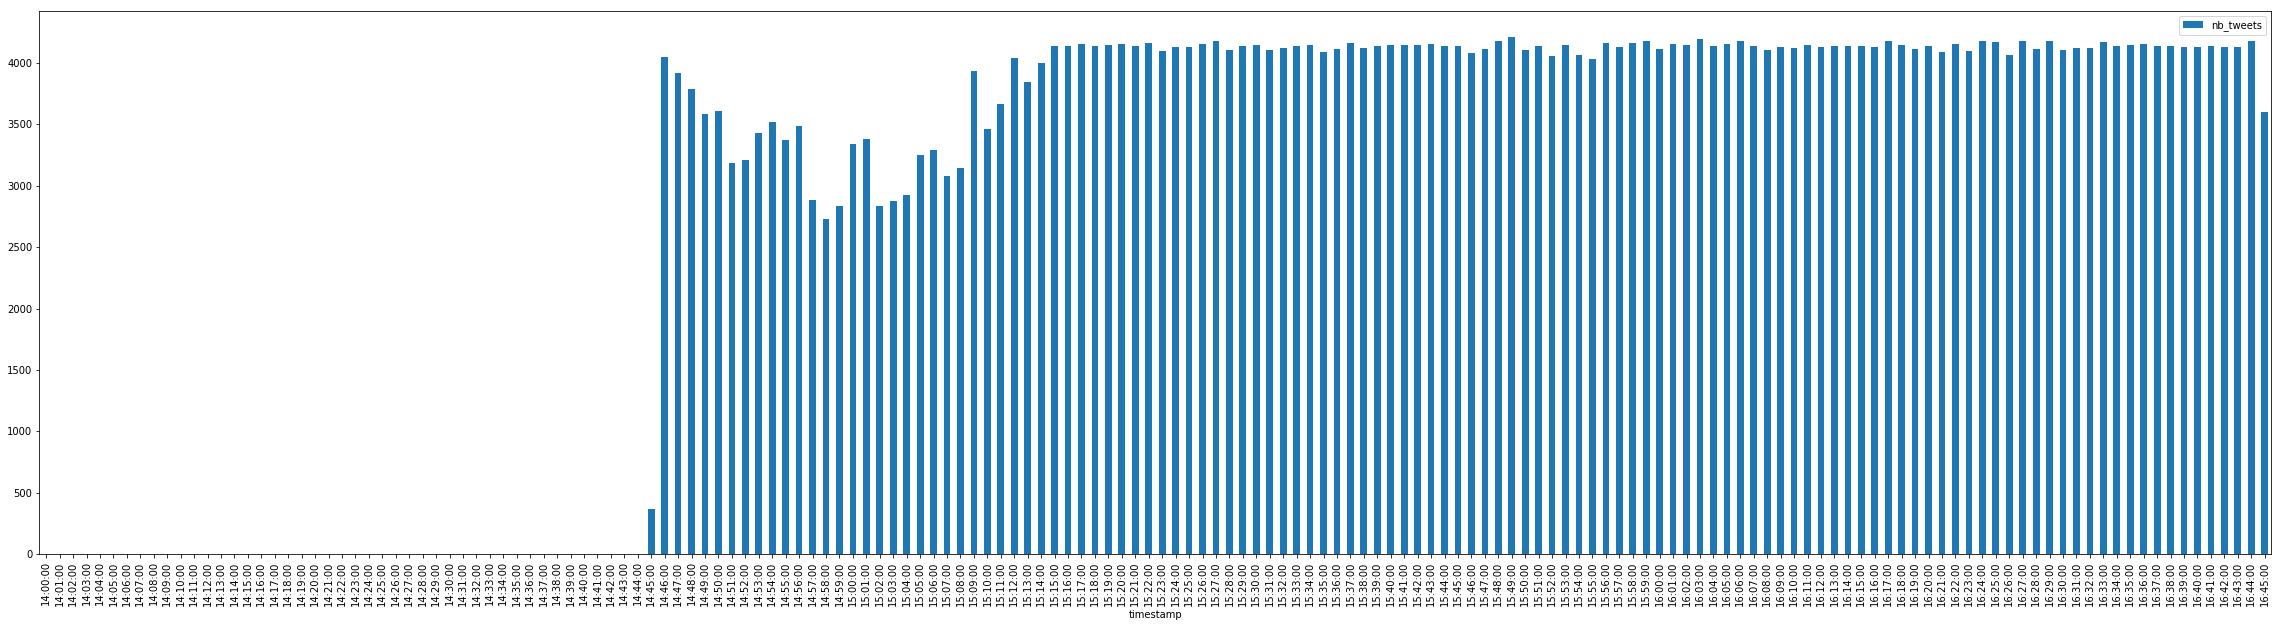

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

df_tweetsByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

In [15]:
#CONSULTA BÁSICA A ELASTICSEARCH PARA PROBAR
res = es.search(index="p8", body={"query": {"term":{"text":"goal"}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print("TWEET:%(text)s %(username)s: %(date)s" % hit["_source"])

Got 22679 Hits:
TWEET:Goal goal goal goal goal goal!!!!!!!!!!!!!!!!!!!!!! #RealMadrid #RMALIV #UCLfinal Preveza Epirus: Sat May 26 20:13:28 +0000 2018
TWEET:Goal goal goal goal goal goal!!!!!!!!!!!!!!!!!!!!!! #RealMadrid #RMALIV #UCLfinal Preveza Epirus: Sat May 26 20:13:28 +0000 2018
TWEET:Goal 
Goal
Goal
Goal
#UCLfinal Olouwadamissi: Sat May 26 19:57:14 +0000 2018
TWEET:Goal 
Goal
Goal
Goal
#UCLfinal Olouwadamissi: Sat May 26 19:57:14 +0000 2018
TWEET:Super goal goal goal goal goal https://t.co/FVh1CVOEGA Abouuuuuuuuuuuuu Impala: Sat May 26 20:12:56 +0000 2018
TWEET:Super goal goal goal goal goal https://t.co/FVh1CVOEGA Abouuuuuuuuuuuuu Impala: Sat May 26 20:12:56 +0000 2018
TWEET:GOAL GOAL GOAL GOAL GOOOAAAAL MANEEEEE #UCLFinal NooR: Sat May 26 20:01:07 +0000 2018
TWEET:Goal! Goal!! Goal!!! Sadio Mane #UCLfinal P!: Sat May 26 20:00:31 +0000 2018
TWEET:Goal! Goal!! Goal!!! Sadio Mane #UCLfinal P!: Sat May 26 20:00:31 +0000 2018
TWEET:#UCLfinal

Never felt this alive. Goal goal goal G

# ¿Cuántos tweets tienen la palabra "liverpool"? ¿Cómo se distribuye los tweets en el tiempo (ver en un histograma)

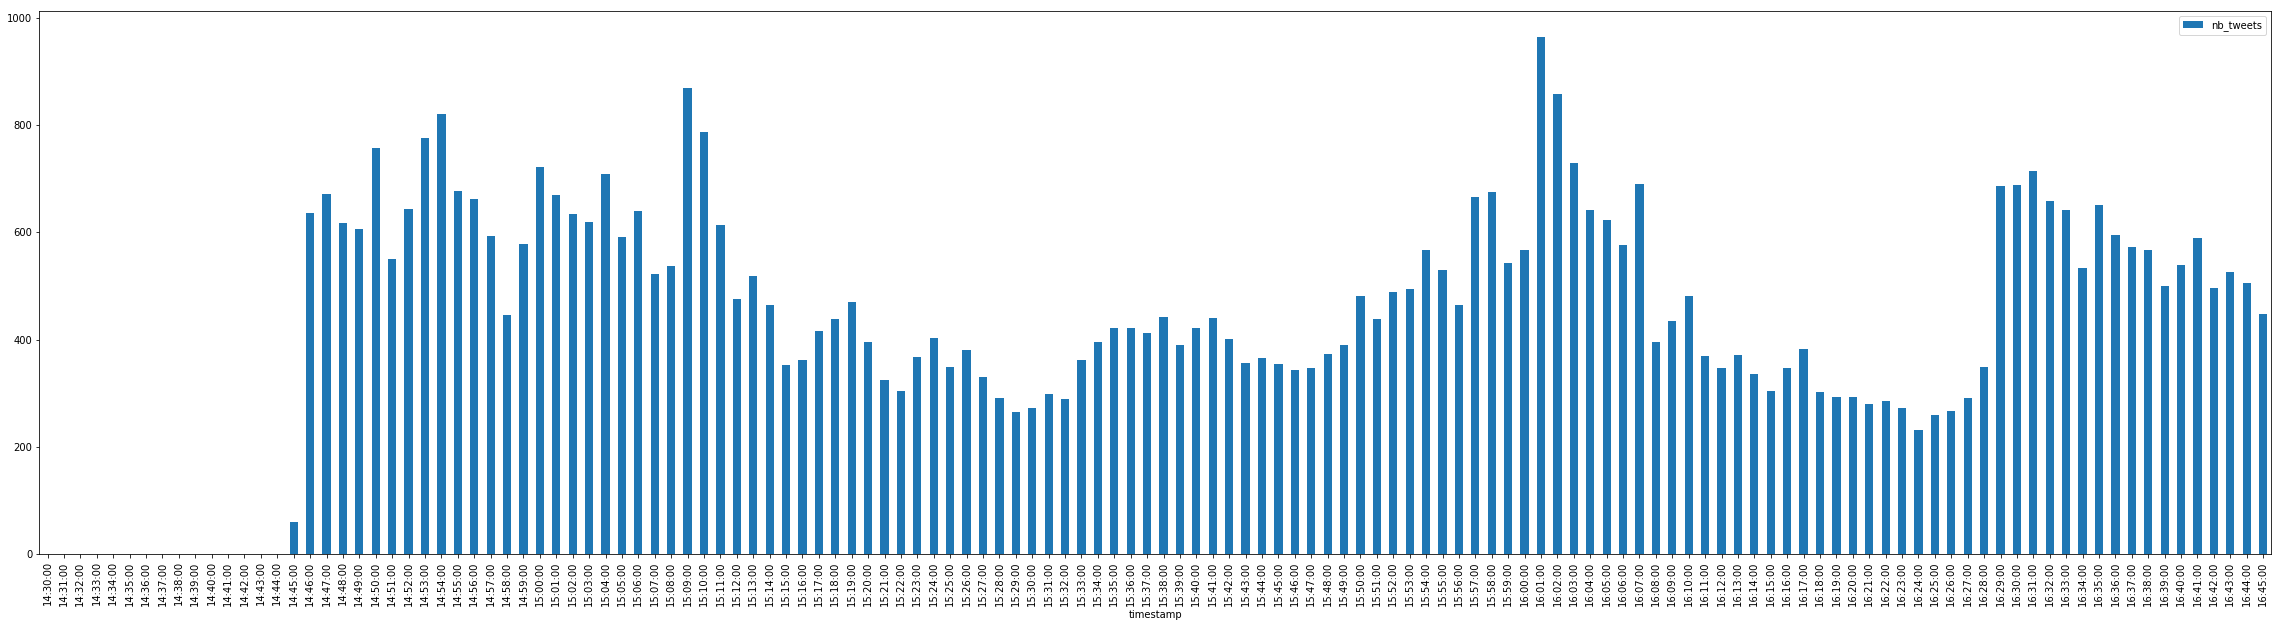

In [16]:
res = es.search(index="p8", 
                body={
                    "query": {
                        "term":{
                            "text":"liverpool"
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m"
                            }
                        }
                    }
                }) 
df_liverpoolByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpoolByMinutes = df_liverpoolByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
## Filtrar Datos
df_liverpoolByMinutes_filtered = df_liverpoolByMinutes.drop(df_liverpoolByMinutes[df_liverpoolByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_liverpoolByMinutes_filtered['timestamp']=df_liverpoolByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_liverpoolByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

## ¿De dónde vienen los tweets? (utilizar el campo 'location')

In [17]:
res = es.search(index="p8", 
                body={
                    "aggs": {
                        "locations": {
                            "terms": {
                                "field": "location.keyword",
                                'size': 354586
                            }
                        }
                    }
                })

df_locations = pd.DataFrame(res['aggregations']['locations']['buckets'])
df_locations[:15]

,doc_count,key
0,4733,"Lagos, Nigeria"
1,3403,Nigeria
2,2564,"London, England"
3,2359,"Nairobi, Kenya"
4,2206,South Africa
5,1896,"Johannesburg, South Africa"
6,1575,London
7,1365,United Kingdom
8,1349,Brasil
9,1267,"Rio de Janeiro, Brasil"


## ¿Cuántos tweets tienen las palabras "liverpool" y "goal"? (ver en un histograma)

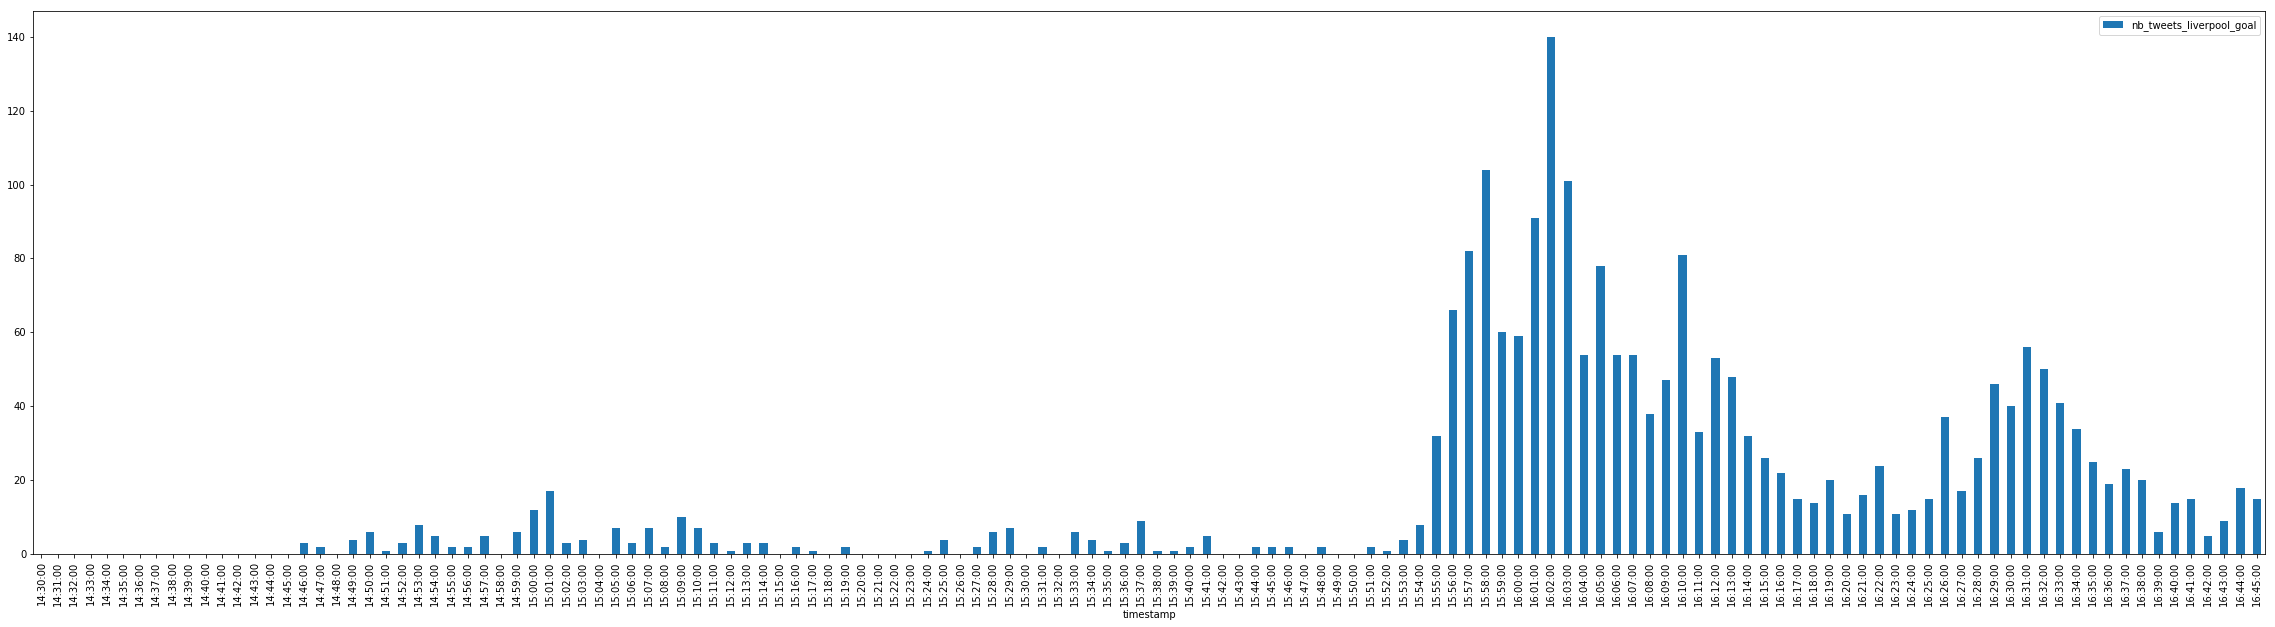

In [18]:
res = es.search(index="p8", 
                body={
                    "query": {
                        "bool":{
                            "filter" : [
                                { "term" : { "text" : "liverpool" } },
                                { "term" : { "text" : "goal" } }
                              ]
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m"
                            }
                        }
                    }
                }) 
df_liverpool_goalByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpool_goalByMinutes = df_liverpool_goalByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_liverpool_goal'})
## Filtrar Datos
df_liverpool_goalByMinutes_filtered = df_liverpool_goalByMinutes.drop(df_liverpool_goalByMinutes[df_liverpool_goalByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_liverpool_goalByMinutes_filtered['timestamp']=df_liverpool_goalByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_liverpool_goalByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

# Graficar un Pie Chart comparando el número de tweets con:
### a) la palabra 'liverpool',
### b) la palabra 'madrid',
### c) la palabra 'madrid' y 'liverpool'
### d) ninguna de las palabras



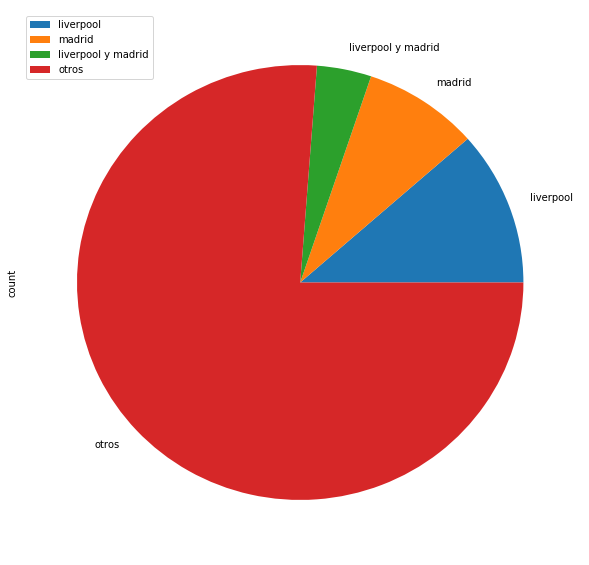

In [24]:
liverpool = es.search(index="p8", 
                body={"query": {"term" : { "text" : "liverpool" }}})
madrid =  es.search(index="p8", 
                body={"query": {"term" : { "text" : "madrid" }}})
liverpoolmadrid = es.search(index="p8", 
                body={
                    "query": {
                        "bool":{
                            "must" : [
                                { "term" : { "text" : "liverpool" } },
                                { "term" : { "text" : "madrid" } }
                              ]
                        }
                    }
                })
noliverpoolmadrid = es.search(index="p8", 
                body={
                    "query": {
                        "bool":{
                            "must_not" : [
                                { "term" : { "text" : "liverpool" } },
                                { "term" : { "text" : "madrid" } }
                              ]
                        }
                    }
                })
noliverpoolmadrid['hits']['total']
num_tweets = pd.DataFrame({
    'count':[ liverpool['hits']['total'],madrid['hits']['total'],liverpoolmadrid['hits']['total'],noliverpoolmadrid['hits']['total']]
    }, columns=['count'], index=['liverpool','madrid','liverpool y madrid', 'otros'])
num_tweets.plot.pie(y='count', figsize=(10, 10))